# FIFA DATASET

# Índice

1. [Jugadores](#jugadores)
   - [Fase 2: Comprensión de los datos](#fase-2-comprensión-de-los-datos-jugadores)
      - [1.1 Descripción de los datos](#1-1-descripción-de-los-datos-jugadores)
      - [1.2 Análisis exploratorio](#1-2-análisis-exploratorio-jugadores)
      - [1.3 Calidad de datos](#1-3-calidad-de-datos-jugadores)

2. [Equipos](#equipos)
   - [Fase 2: Comprensión de los datos](#fase-2-comprensión-de-los-datos-equipos)
      - [2.1 Descripción de los datos](#2-1-descripción-de-los-datos-equipos)
      - [2.2 Análisis exploratorio](#2-2-análisis-exploratorio-equipos)
      - [2.3 Calidad de datos](#2-3-calidad-de-datos-equipos)

3. [Entrenadores](#entrenadores)
   - [Fase 2: Comprensión de los datos](#fase-2-comprensión-de-los-datos-entrenadores)
      - [3.1 Descripción de los datos](#3-1-descripción-de-los-datos-entrenadores)
      - [3.2 Análisis exploratorio](#3-2-análisis-exploratorio-entrenadores)
      - [3.3 Calidad de datos](#3-3-calidad-de-datos-entrenadores)

4. [Fase 3: Preparación de los datos](#fase-3-preparación-de-los-datos)
   - [4.1 Limpieza](#4-1-limpieza)
   - [4.2 Integración](#4-2-integración)
   - [4.3 Estructuración](#4-3-estructuración)
   - [4.4 Ingeniería de características](#4-4-ingeniería-de-características)

5. [Fase 4: Modelado](#fase-4-modelado)
   - [5.1 Definición del modelo](#5-1-definición-del-modelo)
   - [5.2 Predicción](#5-2-predicción)
   - [5.3 Evaluación](#5-3-evaluación)

6. [Fase 5: Evaluación](#fase-5-evaluación)
   - [6.1 Evaluación de los datos de prueba](#6-1-evaluación-de-los-datos-de-prueba)
   - [6.2 Importancia características](#6-2-importancia-características)
   - [6.3 Predicción](#6-3-predicción)


Los datos de FIFA están distribuidos en archivos .csv de las distintas temporadas, son informaciones provenientes de realizar web-scraping en la página web de Sofifa.
Para poder acceder a los datos necesitamos recorrer la carpeta:


In [285]:
import pandas as pd
import numpy as np
import missingno as msno
from plotly.offline import init_notebook_mode
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings
from joblib import dump, load
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import os
# import kaggle

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [286]:
# Para descargar los archivos via API es necesario tener un token almacenado en un archivo kaggle.json en el directorio ~/.kaggle/


# def descargar_archivo(dataset, ruta_archivo):
#     if not os.path.exists(ruta_archivo):
#         print(f"Descargando archivo: {ruta_archivo}")
#         kaggle.api.dataset_download_files(dataset, path=ruta_archivo, unzip=True)
#         print(f"Archivo descargado en {ruta_archivo}")
#     else:
#         print(f"El archivo ya existe: {ruta_archivo}")
#
# # Configura la ruta del archivo
# ruta_jugadores = 'data/male_players (legacy).csv'
# ruta_equipos = 'data/male_teams.csv'
# ruta_entrenadores = 'data/male_coaches.csv'
#
# # Descarga los archivos si no existen
# descargar_archivo('stefanoleone992/fifa-23-complete-player-dataset', '/data')

In [287]:
ruta_jugadores = 'data/male_players (legacy).csv'
df_jugadores = pd.read_csv(ruta_jugadores,low_memory = False)
df_jugadores.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,1987-06-24,169,67,53.0,La Liga,1.0,241.0,FC Barcelona,CF,10.0,NaN,2004-07-01,2018.0,52,Argentina,1369.0,CF,10.0,Left,3,4,5,Medium/Low,Normal (170-),Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...","Finesse Shot, Speed Dribbler (AI), One Club Pl...",93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25,21,20,6,11,15,14,8,NaN,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,1985-02-05,185,80,53.0,La Liga,1.0,243.0,Real Madrid CF,LW,7.0,NaN,2009-07-01,2018.0,38,Portugal,1354.0,LW,7.0,Right,4,5,5,High/Low,Normal (185+),Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22,31,23,7,11,15,14,11,NaN,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,1984-01-23,180,80,19.0,Bundesliga,1.0,21.0,FC Bayern München,SUB,10.0,NaN,2009-08-28,2017.0,34,Netherlands,105035.0,RS,11.0,Left,2,4,5,High/Low,Normal (170-185),Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Diver, Injury Prone, Avoids Using Weaker Foot,...",93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,NaN,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,1981-10-03,195,95,16.0,Ligue 1,1.0,73.0,Paris Saint-Germain,ST,10.0,NaN,2012-07-01,2016.0,46,Sweden,1363.0,ST,10.0,Right,4,4,5,Medium/Low,Normal (185+),Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...","Power Free-Kick, Leadership, Flair, Long Shot ...",76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84

In [288]:
ruta_equipos = 'data/male_teams.csv'
df_equipos = pd.read_csv(ruta_equipos,low_memory = False)
df_equipos.head(5)

,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,rival_team,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age,captain,short_free_kick,long_free_kick,left_short_free_kick,right_short_free_kick,penalties,left_corner,right_corner,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,def_defence_defender_line,off_style,off_build_up_play,off_chance_creation,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,455361.0,Etihad Stadium,11,10,10.0,NaN,-2.147484e+09,27.09,25.88,186942.0,192985.0,192985.0,192985.0,192985.0,192985.0,192985.0,237692.0,Press After Possession Loss,71.0,81.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,71.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,/team/73/paris-saint-germain/230009,23,9,2023-01-13,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,524011.0,Parc des Princes,219,9,10.0,NaN,-2.147484e+09,26.82,26.04,207865.0,190871.0,158023.0,190871.0,158023.0,190871.0,190871.0,190871.0,Press After Possession Loss,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,41.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,/team/243/real-madrid/230009,23,9,2023-01-13,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,455800.0,Estadio Santiago Bernabéu,241,10,10.0,NaN,-2.147484e+09,28.55,24.64,165153.0,182521.0,182521.0,182521.0,197445.0,165153.0,182521.0,182521.0,Balanced,51.0,71.0,NaN,NaN,NaN,NaN,NaN,Balanced,Balanced,51.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1337,/team/1337/germany/230009,23,9,2023-01-13,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,37352367.0,Stadion Olympik,1318,10,NaN,NaN,NaN,28.27,27.22,167495.0,186942.0,212622.0,186942.0,186942.0,186942.0,212622.0,212622.0,Pressure On Heavy Touch,61.0,61.0,NaN,NaN,NaN,NaN,NaN,Fast Build Up,Forward Runs,61.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,/team/5/chelsea/230009,23,9,2023-01-13,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,452683.0,Stamford Bridge,1,8,9.0,NaN,-2.147484e+09,26.73,24.55,205498.0,233064.0,233064.0,233064.0,233064.0,205498.0,233064.0,233064.0,Balanced,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,61.0,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
ruta_entrenadores = 'data/male_coaches.csv'
df_entrenadores = pd.read_csv(ruta_entrenadores,low_memory = False)
df_entrenadores.head(5)

,coach_id,coach_url,short_name,long_name,dob,nationality_id,nationality_name,face_url
0,24,/coach/24/david-unsworth/,D. Unsworth,David Unsworth,1973-10-16,14,England,NaN
1,50,/coach/50/steven-gerrard/,S. Gerrard,Steven Gerrard,1980-05-30,14,England,https://cdn.sportmonks.com/images/soccer/playe...
2,95,/coach/95/frank-lampard/,F. Lampard,Frank Lampard,1978-06-20,14,England,https://cdn.sportmonks.com/images/soccer/playe...
3,121,/coach/121/carl-hoefkens/,C. Hoefkens,Carl Hoefkens,1978-10-05,7,Belgium,https://cdn.sportmonks.com/images//soccer/coac...
4,123,/coach/123/matthew-etherington/,M. Etherington,Matthew Etherington,1981-08-14,14,England,https://cdn.sportmonks.com/images/soccer/playe...


## Jugadores

### Fase 2: Comprensión de los datos

In [290]:
df_jugadores.sort_values(['league_name', 'club_name', 'fifa_version', 'potential'],inplace=True)
df_jugadores.reset_index(drop=True,inplace=True)
df_jugadores

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,192901,/player/192901/murtaz-daushvili/230002,23,2,2022-09-26,M. Daushvili,Murtaz Daushvili,CDM,63,63,240000.0,500.0,33,1989-05-01,176,72,318.0,1. Division,1.0,100135.0,APOEL,SUB,8.0,NaN,2021-07-01,2023.0,20,Georgia,NaN,NaN,NaN,Right,3,2,1,Low/Medium,Normal (170-185),No,528000.0,NaN,NaN,61.0,35.0,58.0,55.0,58.0,59.0,42,32,40,72,29,39,49,45,57,66,62,60,72,70,74,33,51,68,56,39,56,60,50,54,52,60.0,61,60,54,11,6,16,12,15,NaN,48+2,48+2,48+2,53,53,53,53,53,56+2,56+2,56+2,55+2,60+2,60+2,60+2,55+2,60+2,62+1,62+1,62+1,60+2,60+2,58+2,58+2,58+2,60+2,18+2,https://cdn.sofifa.net/players/192/901/23_120.png
1,260674,/player/260674/anton-maglica/230002,23,2,2022-09-26,A. Maglica,Anton Maglica,ST,65,65,700000.0,500.0,30,1991-11-11,181,73,318.0,1. Division,1.0,100135.0,APOEL,SUB,9.0,NaN,2021-08-05,2023.0,10,Croatia,NaN,NaN,NaN,Right,3,2,1,Medium/Low,Lean (170-185),No,1500000.0,NaN,NaN,58.0,68.0,53.0,62.0,40.0,54.0,48,71,65,59,59,60,54,49,49,70,61,55,59,61,61,66,72,51,58,66,45,40,71,49,58,49.0,34,38,35,15,6,6,14,7,NaN,65,65,65,62,64,64,64,62,61+2,61+2,61+2,60+2,57+2,57+2,57+2,60+2,49+2,49+2,49+2,49+2,49+2,48+2,47+2,47+2,47+2,48+2,16+2,https://cdn.sofifa.net/players/260/674/23_120.png
2,270505,/player/270505/daniel-dumbravanu/230002,23,2,2022-09-26,D. Dumbravanu,Daniel Dumbravanu,CB,56,65,300000.0,500.0,20,2001-07-22,192,66,318.0,1. Division,1.0,100135.0,APOEL,SUB,40.0,NaN,2022-07-12,2025.0,33,Moldova,NaN,NaN,NaN,Left,3,2,1,Low/Medium,Lean (185+),No,720000.0,NaN,Power Header,52.0,37.0,39.0,50.0,57.0,56.0,24,35,68,54,22,46,31,22,42,58,54,50,51,53,44,52,40,63,52,29,60,56,24,30,56,48.0,55,57,54,8,7,14,13,5,NaN,46+2,46+2,46+2,43,44,44,44,43,44+2,44+2,44+2,45+2,47+2,47+2,47+2,45+2,52+2,54+2,54+2,54+2,52+2,53+2,56+2,56+2,56+2,53+2,13+2,https://cdn.sofifa.net/players/270/505/23_120.png
3,269908,/player/269908/marios-elia/230002,23,2,2022-09-26,M. Elia,Marios Elia,"RW, CF",65,66,850000.0,500.0,26,1996-05-19,184,78,318.0,1. Division,1.0,100135.0,APOEL,SUB,19.0,NaN,2022-06-28,2023.0,11,Cyprus,NaN,NaN,NaN,Right,4,2,1,Medium/Low,Normal (170-185),No,1900000.0,NaN,"Finesse Shot, Long Shot Taker (AI), Chip Shot ...",74.0,69.0,56.0,65.0,34.0,67.0,58,70,70,58,63,65,65,48,48,69,73,75,58,59,64,68,70,68,70,70,57,35,65,57,62,62.0,28,29,26,15,8,7,9,10,NaN,67-1,67-1,67-1,65,66,66,66,65,63+2,63+2,63+2,64+2,58+2,58+2,58+2,64+2,51+2,48+2,48+2,48+2,51+2,49+2,46+2,46+2,46+2,49+2,16+2,https://cdn.sofifa.net/players/269/908/23_120.png
4,271020,/player/271020/rafael-mascarenhas-moreira/230002,23,2,2022-09-26,Rafael Moreira,Rafael Mascarenhas Moreira,"RW, LW",58,66,450000.0,500.0,20,2002-04-05,183,72,318.0,1.

In [291]:
pd.set_option('display.max_info_columns', df_jugadores.shape[1])
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 110 columns):
 #    Column                          Non-Null Count   Dtype  
---   ------                          --------------   -----  
 0    player_id                       161583 non-null  int64  
 1    player_url                      161583 non-null  object 
 2    fifa_version                    161583 non-null  int64  
 3    fifa_update                     161583 non-null  int64  
 4    fifa_update_date                161583 non-null  object 
 5    short_name                      161583 non-null  object 
 6    long_name                       161583 non-null  object 
 7    player_positions                161583 non-null  object 
 8    overall                         161583 non-null  int64  
 9    potential                       161583 non-null  int64  
 10   value_eur                       159530 non-null  float64
 11   wage_eur                        159822 non-null  float64
 12   

### 2.1 Análisis exploratorio

In [292]:
df_jugadores_filtrado = df_jugadores.copy()
df_jugadores_filtrado

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,192901,/player/192901/murtaz-daushvili/230002,23,2,2022-09-26,M. Daushvili,Murtaz Daushvili,CDM,63,63,240000.0,500.0,33,1989-05-01,176,72,318.0,1. Division,1.0,100135.0,APOEL,SUB,8.0,NaN,2021-07-01,2023.0,20,Georgia,NaN,NaN,NaN,Right,3,2,1,Low/Medium,Normal (170-185),No,528000.0,NaN,NaN,61.0,35.0,58.0,55.0,58.0,59.0,42,32,40,72,29,39,49,45,57,66,62,60,72,70,74,33,51,68,56,39,56,60,50,54,52,60.0,61,60,54,11,6,16,12,15,NaN,48+2,48+2,48+2,53,53,53,53,53,56+2,56+2,56+2,55+2,60+2,60+2,60+2,55+2,60+2,62+1,62+1,62+1,60+2,60+2,58+2,58+2,58+2,60+2,18+2,https://cdn.sofifa.net/players/192/901/23_120.png
1,260674,/player/260674/anton-maglica/230002,23,2,2022-09-26,A. Maglica,Anton Maglica,ST,65,65,700000.0,500.0,30,1991-11-11,181,73,318.0,1. Division,1.0,100135.0,APOEL,SUB,9.0,NaN,2021-08-05,2023.0,10,Croatia,NaN,NaN,NaN,Right,3,2,1,Medium/Low,Lean (170-185),No,1500000.0,NaN,NaN,58.0,68.0,53.0,62.0,40.0,54.0,48,71,65,59,59,60,54,49,49,70,61,55,59,61,61,66,72,51,58,66,45,40,71,49,58,49.0,34,38,35,15,6,6,14,7,NaN,65,65,65,62,64,64,64,62,61+2,61+2,61+2,60+2,57+2,57+2,57+2,60+2,49+2,49+2,49+2,49+2,49+2,48+2,47+2,47+2,47+2,48+2,16+2,https://cdn.sofifa.net/players/260/674/23_120.png
2,270505,/player/270505/daniel-dumbravanu/230002,23,2,2022-09-26,D. Dumbravanu,Daniel Dumbravanu,CB,56,65,300000.0,500.0,20,2001-07-22,192,66,318.0,1. Division,1.0,100135.0,APOEL,SUB,40.0,NaN,2022-07-12,2025.0,33,Moldova,NaN,NaN,NaN,Left,3,2,1,Low/Medium,Lean (185+),No,720000.0,NaN,Power Header,52.0,37.0,39.0,50.0,57.0,56.0,24,35,68,54,22,46,31,22,42,58,54,50,51,53,44,52,40,63,52,29,60,56,24,30,56,48.0,55,57,54,8,7,14,13,5,NaN,46+2,46+2,46+2,43,44,44,44,43,44+2,44+2,44+2,45+2,47+2,47+2,47+2,45+2,52+2,54+2,54+2,54+2,52+2,53+2,56+2,56+2,56+2,53+2,13+2,https://cdn.sofifa.net/players/270/505/23_120.png
3,269908,/player/269908/marios-elia/230002,23,2,2022-09-26,M. Elia,Marios Elia,"RW, CF",65,66,850000.0,500.0,26,1996-05-19,184,78,318.0,1. Division,1.0,100135.0,APOEL,SUB,19.0,NaN,2022-06-28,2023.0,11,Cyprus,NaN,NaN,NaN,Right,4,2,1,Medium/Low,Normal (170-185),No,1900000.0,NaN,"Finesse Shot, Long Shot Taker (AI), Chip Shot ...",74.0,69.0,56.0,65.0,34.0,67.0,58,70,70,58,63,65,65,48,48,69,73,75,58,59,64,68,70,68,70,70,57,35,65,57,62,62.0,28,29,26,15,8,7,9,10,NaN,67-1,67-1,67-1,65,66,66,66,65,63+2,63+2,63+2,64+2,58+2,58+2,58+2,64+2,51+2,48+2,48+2,48+2,51+2,49+2,46+2,46+2,46+2,49+2,16+2,https://cdn.sofifa.net/players/269/908/23_120.png
4,271020,/player/271020/rafael-mascarenhas-moreira/230002,23,2,2022-09-26,Rafael Moreira,Rafael Mascarenhas Moreira,"RW, LW",58,66,450000.0,500.0,20,2002-04-05,183,72,318.0,1.

In [293]:
column_list = df_jugadores_filtrado.columns.tolist()
print(column_list)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [294]:
df_jugadores_filtrado[['fifa_update_date', 'dob', 'club_joined_date', 'club_contract_valid_until_year']] = df_jugadores_filtrado[['fifa_update_date', 'dob', 'club_joined_date','club_contract_valid_until_year']].apply(pd.to_datetime)

In [295]:
print(f'En el dataset de FIFA hay: {len(pd.unique(df_jugadores_filtrado["player_id"]))} jugadores, correspondiente a {len(pd.unique(df_jugadores_filtrado["fifa_version"]))} versiones de FIFA.')
print(f'En total hay representados: {len(pd.unique(df_jugadores_filtrado["club_team_id"]))} equipos, {len(pd.unique(df_jugadores_filtrado["league_name"]))} ligas y {len(pd.unique(df_jugadores_filtrado["nation_team_id"]))} nacionalidades.')
print(f'La última actualización de los datos fue el: {df_jugadores_filtrado["fifa_update_date"].max().date()}.')

En el dataset de FIFA hay: 49699 jugadores, correspondiente a 9 versiones de FIFA.
En total hay representados: 1056 equipos, 45 ligas y 57 nacionalidades.
La última actualización de los datos fue el: 2022-09-26.


In [296]:
df_jugadores_filtrado = df_jugadores_filtrado.drop(['player_url', 'fifa_update_date', 'player_face_url', 'height_cm', 'weight_kg', 'club_contract_valid_until_year', 'nationality_id', 'preferred_foot', 'weak_foot', 'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1)
df_jugadores_filtrado

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,nationality_name,nation_team_id,nation_position,nation_jersey_number,skill_moves,international_reputation,work_rate,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,192901,23,2,M. Daushvili,Murtaz Daushvili,CDM,63,63,240000.0,500.0,33,1989-05-01,318.0,1. Division,1.0,100135.0,APOEL,SUB,8.0,NaN,2021-07-01,Georgia,NaN,NaN,NaN,2,1,Low/Medium,528000.0,NaN,NaN,61.0,35.0,58.0,55.0,58.0,59.0,42,32,40,72,29,39,49,45,57,66,62,60,72,70,74,33,51,68,56,39,56,60,50,54,52,60.0,61,60,54,11,6,16,12,15,NaN
1,260674,23,2,A. Maglica,Anton Maglica,ST,65,65,700000.0,500.0,30,1991-11-11,318.0,1. Division,1.0,100135.0,APOEL,SUB,9.0,NaN,2021-08-05,Croatia,NaN,NaN,NaN,2,1,Medium/Low,1500000.0,NaN,NaN,58.0,68.0,53.0,62.0,40.0,54.0,48,71,65,59,59,60,54,49,49,70,61,55,59,61,61,66,72,51,58,66,45,40,71,49,58,49.0,34,38,35,15,6,6,14,7,NaN
2,270505,23,2,D. Dumbravanu,Daniel Dumbravanu,CB,56,65,300000.0,500.0,20,2001-07-22,318.0,1. Division,1.0,100135.0,APOEL,SUB,40.0,NaN,2022-07-12,Moldova,NaN,NaN,NaN,2,1,Low/Medium,720000.0,NaN,Power Header,52.0,37.0,39.0,50.0,57.0,56.0,24,35,68,54,22,46,31,22,42,58,54,50,51,53,44,52,40,63,52,29,60,56,24,30,56,48.0,55,57,54,8,7,14,13,5,NaN
3,269908,23,2,M. Elia,Marios Elia,"RW, CF",65,66,850000.0,500.0,26,1996-05-19,318.0,1. Division,1.0,100135.0,APOEL,SUB,19.0,NaN,2022-06-28,Cyprus,NaN,NaN,NaN,2,1,Medium/Low,1900000.0,NaN,"Finesse Shot, Long Shot Taker (AI), Chip Shot ...",74.0,69.0,56.0,65.0,34.0,67.0,58,70,70,58,63,65,65,48,48,69,73,75,58,59,64,68,70,68,70,70,57,35,65,57,62,62.0,28,29,26,15,8,7,9,10,NaN
4,271020,23,2,Rafael Moreira,Rafael Mascarenhas Moreira,"RW, LW",58,66,450000.0,500.0,20,2002-04-05,318.0,1. Division,1.0,100135.0,APOEL,RES,90.0,NaN,2022-07-29,Portugal,NaN,NaN,NaN,3,1,Medium/Low,1100000.0,NaN,Technical Dribbler (AI),86.0,49.0,45.0,58.0,23.0,52.0,64,51,33,40,44,63,41,37,33,54,83,88,63,40,62,50,48,58,52,42,46,24,56,49,54,41.0,18,25,21,6,5,7,9,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,140233,23,2,G. Ochoa,Francisco Guillermo Ochoa Magaña,GK,80,80,NaN,NaN,36,1985-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Mexico,1386.0,GK,13.0,1,1,Medium/Medium,NaN,NaN,"Leadership, GK Long Throw, Cautious With Crosses",NaN,NaN,NaN,NaN,NaN,NaN,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,79,38,60,11,19,23,16,50,16,60.0,21,10,12,82,73,70,81,84,50.0
161579,204120,23,2,T. Vaclík,Tomáš Vaclík,GK,80,80,NaN,NaN,33,1989-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Czech Republic,1330.0,GK,1.0,1,1,Medium/Medium,NaN,NaN,"Team Player, Rushes Out Of Goal, Cautious With...",NaN,NaN,NaN,NaN,NaN,NaN,15,14,19,28,13,14,17,16,45,20,42,37,47,78,56,56,72,38,71,16,29,23,15,67,13,63.0,20,18,18,78,75,74,82,83,40.0
161580,235389,23,2,C. Rodríguez,Carlos Alberto Rodríguez Gómez,"CAM, CM",76,81,NaN,NaN,25,1997-01-03,NaN,NaN,NaN

In [297]:
df_jugadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   player_id                    161583 non-null  int64         
 1   fifa_version                 161583 non-null  int64         
 2   fifa_update                  161583 non-null  int64         
 3   short_name                   161583 non-null  object        
 4   long_name                    161583 non-null  object        
 5   player_positions             161583 non-null  object        
 6   overall                      161583 non-null  int64         
 7   potential                    161583 non-null  int64         
 8   value_eur                    159530 non-null  float64       
 9   wage_eur                     159822 non-null  float64       
 10  age                          161583 non-null  int64         
 11  dob                       

22    19239
21    18887
23    18533
20    18483
19    18086
18    17928
17    17566
16    16679
15    16182
Name: fifa_version, dtype: int64


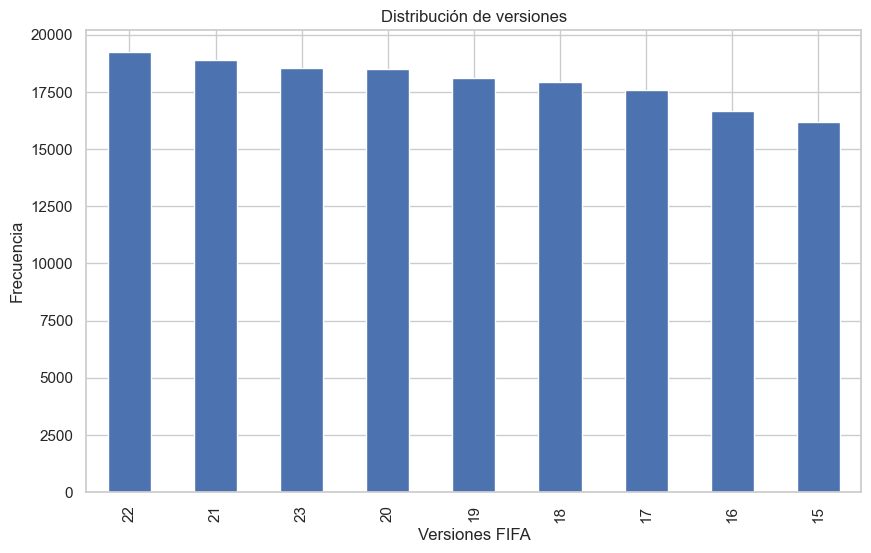

In [298]:
resumen_versiones= df_jugadores_filtrado['fifa_version'].value_counts()
print(resumen_versiones)
plt.figure(figsize=(10,6))
resumen_versiones.plot(kind='bar')
plt.title('Distribución de versiones')
plt.xlabel('Versiones FIFA')
plt.ylabel('Frecuencia')
plt.savefig('resources/1.distribucion_versiones.png', dpi=300, bbox_inches='tight')
plt.show()

In [299]:
resumen_jugadores= df_jugadores_filtrado['long_name'].value_counts()
print(resumen_jugadores)

Danny Ward           18
Adam Smith           16
이재성 李在成              15
Lasse Nielsen        15
Reece James          15
                     ..
Jamie Hollywood       1
설기현 Ki Hyeon Seol     1
Eoghan Dempsey        1
Robert O'Reilly       1
Ibrahim Danlad        1
Name: long_name, Length: 50360, dtype: int64


Everton                    318
Liverpool                  316
Leicester City             296
Manchester United          294
Arsenal                    293
                          ... 
Delfin                      19
Sol de América              19
Guaireña                    19
Independiente Petrolero     19
9 de Octubre                18
Name: club_name, Length: 1409, dtype: int64


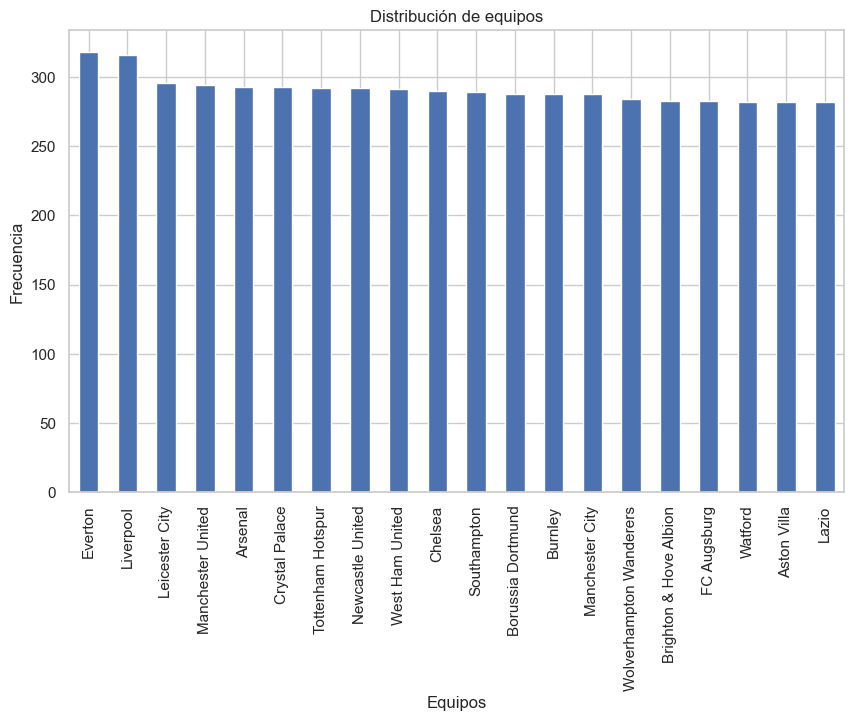

In [300]:
resumen_equipos = df_jugadores_filtrado['club_name'].value_counts()
print(resumen_equipos)
plt.figure(figsize=(10,6))
resumen_equipos.head(20).plot(kind='bar')
plt.title('Distribución de equipos')
plt.xlabel('Equipos')
plt.ylabel('Frecuencia')
plt.savefig('resources/2.distribucion_equipos.png', dpi=300, bbox_inches='tight')
plt.show()

Premier League         8652
Serie A                7557
Bundesliga             7508
Liga Profesional       6695
Championship           6398
Super League           5982
Major League Soccer    5806
League One             5772
League Two             5590
La Liga                5538
La Liga 2              5504
Ligue 1                5263
Ligue 2                4809
Liga Portugal          4565
Super Lig              4560
2. Bundesliga          4532
Primera Division       4462
Eredivisie             4322
Serie B                4305
Liga MX                4076
Jupiler Pro League     4034
Pro League             3995
Ekstraklasa            3916
Liga BetPlay           3809
Allsvenskan            3613
Eliteserien            3568
J-League               3188
3. Liga                3166
K League 1             3018
Superliga              2969
Premiership            2883
Premier Division       2386
A-League               2174
Liga 1                 1677
Rest of World           944
Liga Pro            

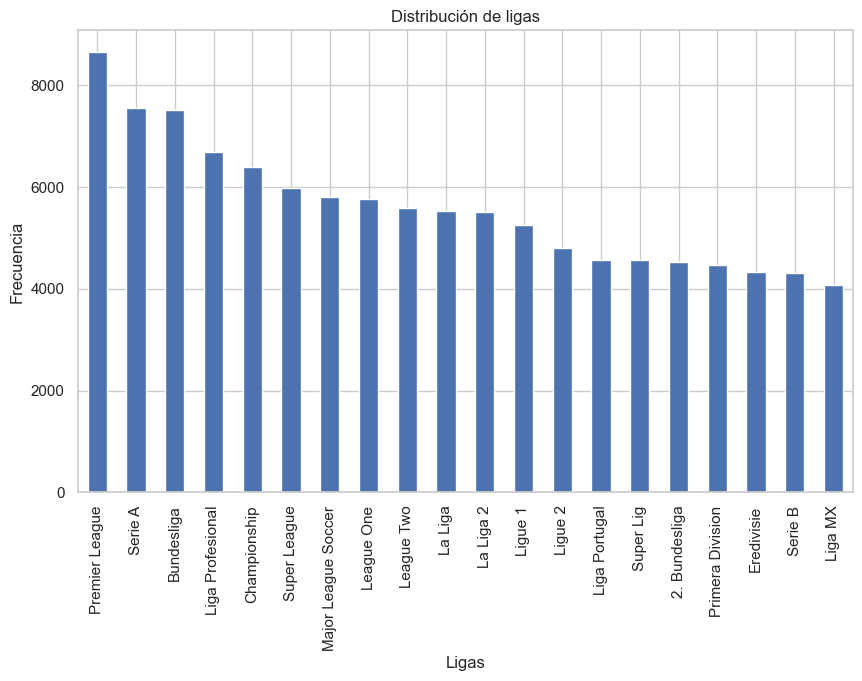

In [301]:
resumen_ligas = df_jugadores_filtrado['league_name'].value_counts()
print(resumen_ligas)
plt.figure(figsize=(10,6))
resumen_ligas.head(20).plot(kind='bar')
plt.title('Distribución de ligas')
plt.xlabel('Ligas')
plt.ylabel('Frecuencia')
plt.savefig('resources/3.distribucion_ligas.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.2 Calidad de datos

value_eur                 2053
wage_eur                  1761
league_id                 1773
league_name               1773
league_level              2717
club_team_id              1773
club_name                 1773
club_position             1773
club_jersey_number        1773
club_loaned_from        152045
club_joined_date         11311
nation_team_id          152267
nation_position         152267
nation_jersey_number    152267
release_clause_eur       57961
player_tags             148920
player_traits            88433
pace                     17969
shooting                 17969
passing                  17969
dribbling                17969
defending                17969
physic                   17969
mentality_composure      32861
goalkeeping_speed       143614


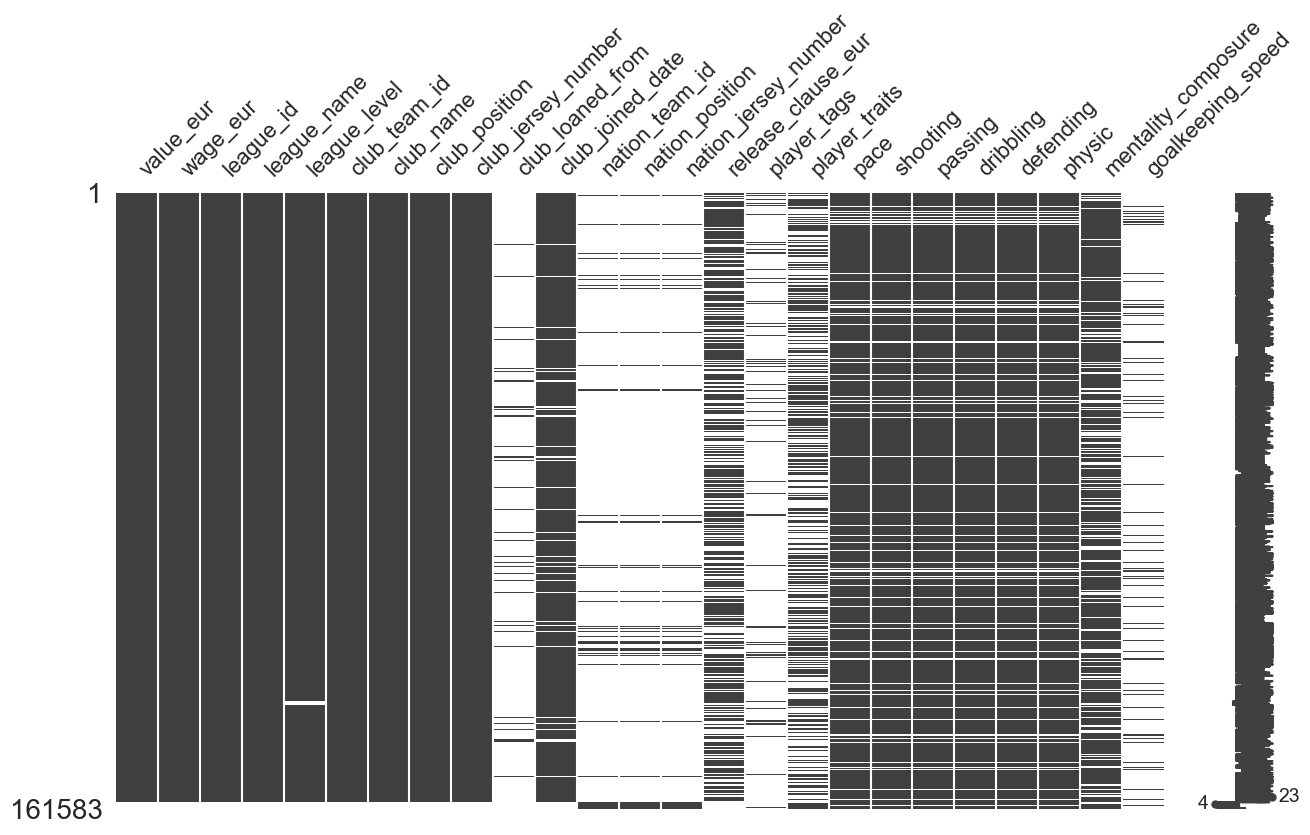

In [302]:
null_values_series = df_jugadores_filtrado.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string())
msno.matrix(df_jugadores_filtrado[null_values_series.index.tolist()], figsize=(15, 8));

In [303]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% de Valores Totales'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
        print ("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que les faltan valores.")
        return mis_val_table_ren_columns

In [304]:
df_jugadores_filtrado.isnull().sum()

player_id                       0
fifa_version                    0
fifa_update                     0
short_name                      0
long_name                       0
                            ...  
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_positioning         0
goalkeeping_reflexes            0
goalkeeping_speed          143614
Length: 72, dtype: int64

In [305]:
missing_values_table(df_jugadores_filtrado)

El dataframe tiene 72 columnas.
Hay 25 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
nation_position,152267,94.2
nation_jersey_number,152267,94.2
nation_team_id,152267,94.2
club_loaned_from,152045,94.1
player_tags,148920,92.2
goalkeeping_speed,143614,88.9
player_traits,88433,54.7
release_clause_eur,57961,35.9
mentality_composure,32861,20.3
shooting,17969,11.1


In [306]:
missing_df = missing_values_table(df_jugadores_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
df_jugadores_filtrado = df_jugadores_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 72 columnas.
Hay 25 columnas que les faltan valores.
Se eliminan 7 columnas.
Son: ['nation_position', 'nation_jersey_number', 'nation_team_id', 'club_loaned_from', 'player_tags', 'goalkeeping_speed', 'player_traits']


In [307]:
df_jugadores_filtrado

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,192901,23,2,M. Daushvili,Murtaz Daushvili,CDM,63,63,240000.0,500.0,33,1989-05-01,318.0,1. Division,1.0,100135.0,APOEL,SUB,8.0,2021-07-01,Georgia,2,1,Low/Medium,528000.0,61.0,35.0,58.0,55.0,58.0,59.0,42,32,40,72,29,39,49,45,57,66,62,60,72,70,74,33,51,68,56,39,56,60,50,54,52,60.0,61,60,54,11,6,16,12,15
1,260674,23,2,A. Maglica,Anton Maglica,ST,65,65,700000.0,500.0,30,1991-11-11,318.0,1. Division,1.0,100135.0,APOEL,SUB,9.0,2021-08-05,Croatia,2,1,Medium/Low,1500000.0,58.0,68.0,53.0,62.0,40.0,54.0,48,71,65,59,59,60,54,49,49,70,61,55,59,61,61,66,72,51,58,66,45,40,71,49,58,49.0,34,38,35,15,6,6,14,7
2,270505,23,2,D. Dumbravanu,Daniel Dumbravanu,CB,56,65,300000.0,500.0,20,2001-07-22,318.0,1. Division,1.0,100135.0,APOEL,SUB,40.0,2022-07-12,Moldova,2,1,Low/Medium,720000.0,52.0,37.0,39.0,50.0,57.0,56.0,24,35,68,54,22,46,31,22,42,58,54,50,51,53,44,52,40,63,52,29,60,56,24,30,56,48.0,55,57,54,8,7,14,13,5
3,269908,23,2,M. Elia,Marios Elia,"RW, CF",65,66,850000.0,500.0,26,1996-05-19,318.0,1. Division,1.0,100135.0,APOEL,SUB,19.0,2022-06-28,Cyprus,2,1,Medium/Low,1900000.0,74.0,69.0,56.0,65.0,34.0,67.0,58,70,70,58,63,65,65,48,48,69,73,75,58,59,64,68,70,68,70,70,57,35,65,57,62,62.0,28,29,26,15,8,7,9,10
4,271020,23,2,Rafael Moreira,Rafael Mascarenhas Moreira,"RW, LW",58,66,450000.0,500.0,20,2002-04-05,318.0,1. Division,1.0,100135.0,APOEL,RES,90.0,2022-07-29,Portugal,3,1,Medium/Low,1100000.0,86.0,49.0,45.0,58.0,23.0,52.0,64,51,33,40,44,63,41,37,33,54,83,88,63,40,62,50,48,58,52,42,46,24,56,49,54,41.0,18,25,21,6,5,7,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,140233,23,2,G. Ochoa,Francisco Guillermo Ochoa Magaña,GK,80,80,NaN,NaN,36,1985-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Mexico,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,12,19,37,16,10,14,17,37,20,50,50,57,70,43,53,79,38,60,11,19,23,16,50,16,60.0,21,10,12,82,73,70,81,84
161579,204120,23,2,T. Vaclík,Tomáš Vaclík,GK,80,80,NaN,NaN,33,1989-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Czech Republic,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,19,28,13,14,17,16,45,20,42,37,47,78,56,56,72,38,71,16,29,23,15,67,13,63.0,20,18,18,78,75,74,82,83
161580,235389,23,2,C. Rodríguez,Carlos Alberto Rodríguez Gómez,"CAM, CM",76,81,NaN,NaN,25,1997-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Mexico,3,1,High/High,NaN,77.0,67.0,73.0,78.0,66.0,67.0,63,72,50,80,50,77,64,61,75,77,78,77,86,73,74,66,65,83,62,62,62,70,72,76,62,80.0,66,70,62,12,15,11,8,10
161581,229980,23,2,C. Montes,César Jasib Montes Castro,CB,77,82,NaN,NaN,25,1997-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Mexico,2,1,Medium/High,NaN,62.0,44.0,63.0,65.0,78.0,78.0,41,43,80,73,31,60,62,37,76,68,66,58,75,76,51,55,84,78,78,35,75,77,56,65,48,75.0,77,78,76,9,10,5,5,13


In [308]:
df_jugadores_filtrado.league_name.value_counts()

Premier League         8652
Serie A                7557
Bundesliga             7508
Liga Profesional       6695
Championship           6398
Super League           5982
Major League Soccer    5806
League One             5772
League Two             5590
La Liga                5538
La Liga 2              5504
Ligue 1                5263
Ligue 2                4809
Liga Portugal          4565
Super Lig              4560
2. Bundesliga          4532
Primera Division       4462
Eredivisie             4322
Serie B                4305
Liga MX                4076
Jupiler Pro League     4034
Pro League             3995
Ekstraklasa            3916
Liga BetPlay           3809
Allsvenskan            3613
Eliteserien            3568
J-League               3188
3. Liga                3166
K League 1             3018
Superliga              2969
Premiership            2883
Premier Division       2386
A-League               2174
Liga 1                 1677
Rest of World           944
Liga Pro            

In [309]:
# eliminar ligas fuera de scope
ligas_no_eliminar = ['Serie A', 'Premier League', 'Bundesliga','La Liga', 'Ligue 1']
df_jugadores_filtrado = df_jugadores_filtrado[df_jugadores_filtrado['league_name'].isin(ligas_no_eliminar)]
df_jugadores_filtrado

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
13708,158667,15,2,T. Bröker,Thomas Bröker,"LM, RM, LW, ST",63,63,300000.0,4000.0,29,1985-01-22,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,11.0,2012-07-01,Germany,2,1,High/Medium,NaN,81.0,68.0,56.0,62.0,37.0,78.0,58,66,64,59,63,63,55,43,48,60,78,83,58,67,58,78,66,84,79,65,72,29,66,57,70,NaN,34,36,34,8,6,13,10,11
13709,181274,15,2,D. Švento,Dušan Švento,"LB, LM",66,66,600000.0,7000.0,28,1985-08-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,29.0,2014-07-01,Slovakia,3,1,High/Medium,NaN,83.0,66.0,64.0,74.0,62.0,55.0,64,62,54,66,80,73,70,63,61,74,84,83,78,71,70,71,54,73,44,70,58,62,61,63,61,NaN,62,65,64,8,10,14,7,13
13710,209987,15,2,M. Schuhen,Marcel Schuhen,GK,60,67,160000.0,2000.0,21,1993-01-13,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,34.0,2012-07-01,Germany,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,25,25,25,25,25,26,21,55,50,59,56,48,37,64,40,82,25,25,25,25,25,25,NaN,25,25,25,64,58,66,57,62
13711,158657,15,2,T. Kessler,Thomas Kessler,GK,69,69,950000.0,15000.0,28,1986-01-20,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,18.0,2007-01-21,Germany,1,2,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,22,25,25,25,25,32,20,56,59,45,67,38,27,63,38,65,25,38,24,25,25,33,NaN,25,25,25,69,74,66,67,66
13712,158444,15,2,M. Brečko,Mišo Brečko,RB,70,70,1100000.0,20000.0,30,1984-05-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,RB,2.0,2008-07-01,Slovenia,2,2,Medium/Medium,NaN,70.0,41.0,59.0,66.0,70.0,70.0,69,33,63,68,28,66,56,58,58,65,72,68,66,68,70,61,69,76,65,39,73,69,55,34,45,NaN,70,71,72,8,9,12,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141830,230487,19,2,Leo Caldeirinha,Leonardo Miguel Garcia Caldeira,"CAM, LM",74,74,2800000.0,15000.0,34,1984-02-29,7.0,Serie A,1.0,1719.0,Vitória,LAM,8.0,2018-01-01,Brazil,4,1,Medium/Medium,5400000.0,72.0,72.0,73.0,75.0,29.0,66.0,75,72,77,73,61,75,79,76,64,75,76,69,71,70,81,72,74,72,64,77,61,22,72,76,65,76.0,25,24,22,18,16,13,15,15
141831,230189,19,2,Silas Almeim,Silas Enaldo Barros de Almeida,"LB, LM",75,75,5500000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,LB,5.0,2018-01-01,Brazil,3,1,Medium/Medium,10500000.0,79.0,56.0,70.0,69.0,73.0,66.0,77,48,66,75,55,66,61,43,72,67,74,83,81,73,76,68,63,73,63,56,67,75,60,63,72,68.0,73,73,77,15,14,15,9,11
141832,230227,19,2,Caio Nunson,Caio Rodrigo Nunes Anjos,"CB, LB",75,75,4900000.0,15000.0,30,1988-02-29,7.0,Serie A,1.0,1719.0,Vitória,RCB,3.0,2018-01-01,Brazil,2,1,Medium/Medium,9400000.0,60.0,50.0,61.0,59.0,73.0,77.0,53,48,77,71,44,61,69,67,57,59,55,64,46,67,48,51,68,54,84,58,88,66,34,51,46,65.0,72,77,72,11,7,8,10,16
141833,230252,19,2,Jorginhson,Jorgino Silas Ruiz Prestes,"CDM, CM, CAM",75,75,6000000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,RDM,6.0,2018-01-01,Brazil,2,1,Medium/Medium,11400000.0,72.0,57.0,68.0,75.0,76.0

In [310]:
print(df_jugadores_filtrado.loc[df_jugadores_filtrado['fifa_version'] == 23, 'fifa_update'].value_counts())

2    3645
Name: fifa_update, dtype: int64


In [311]:
# eliminar las versiones antiguas
mask = df_jugadores_filtrado['fifa_update'] == df_jugadores_filtrado.groupby(['player_id', 'fifa_version'])['fifa_update'].transform('max')
df_filtered = df_jugadores_filtrado[mask]

In [312]:
print(df_filtered.loc[df_filtered['fifa_version'] == 16, 'fifa_update'].value_counts())

2    3674
Name: fifa_update, dtype: int64


In [313]:
print(len(df_jugadores_filtrado))
print(len(df_filtered))

34518
34518


In [314]:
df_jugadores_filtrado = df_filtered
df_jugadores_filtrado

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
13708,158667,15,2,T. Bröker,Thomas Bröker,"LM, RM, LW, ST",63,63,300000.0,4000.0,29,1985-01-22,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,11.0,2012-07-01,Germany,2,1,High/Medium,NaN,81.0,68.0,56.0,62.0,37.0,78.0,58,66,64,59,63,63,55,43,48,60,78,83,58,67,58,78,66,84,79,65,72,29,66,57,70,NaN,34,36,34,8,6,13,10,11
13709,181274,15,2,D. Švento,Dušan Švento,"LB, LM",66,66,600000.0,7000.0,28,1985-08-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,29.0,2014-07-01,Slovakia,3,1,High/Medium,NaN,83.0,66.0,64.0,74.0,62.0,55.0,64,62,54,66,80,73,70,63,61,74,84,83,78,71,70,71,54,73,44,70,58,62,61,63,61,NaN,62,65,64,8,10,14,7,13
13710,209987,15,2,M. Schuhen,Marcel Schuhen,GK,60,67,160000.0,2000.0,21,1993-01-13,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,34.0,2012-07-01,Germany,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,25,25,25,25,25,26,21,55,50,59,56,48,37,64,40,82,25,25,25,25,25,25,NaN,25,25,25,64,58,66,57,62
13711,158657,15,2,T. Kessler,Thomas Kessler,GK,69,69,950000.0,15000.0,28,1986-01-20,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,18.0,2007-01-21,Germany,1,2,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,22,25,25,25,25,32,20,56,59,45,67,38,27,63,38,65,25,38,24,25,25,33,NaN,25,25,25,69,74,66,67,66
13712,158444,15,2,M. Brečko,Mišo Brečko,RB,70,70,1100000.0,20000.0,30,1984-05-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,RB,2.0,2008-07-01,Slovenia,2,2,Medium/Medium,NaN,70.0,41.0,59.0,66.0,70.0,70.0,69,33,63,68,28,66,56,58,58,65,72,68,66,68,70,61,69,76,65,39,73,69,55,34,45,NaN,70,71,72,8,9,12,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141830,230487,19,2,Leo Caldeirinha,Leonardo Miguel Garcia Caldeira,"CAM, LM",74,74,2800000.0,15000.0,34,1984-02-29,7.0,Serie A,1.0,1719.0,Vitória,LAM,8.0,2018-01-01,Brazil,4,1,Medium/Medium,5400000.0,72.0,72.0,73.0,75.0,29.0,66.0,75,72,77,73,61,75,79,76,64,75,76,69,71,70,81,72,74,72,64,77,61,22,72,76,65,76.0,25,24,22,18,16,13,15,15
141831,230189,19,2,Silas Almeim,Silas Enaldo Barros de Almeida,"LB, LM",75,75,5500000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,LB,5.0,2018-01-01,Brazil,3,1,Medium/Medium,10500000.0,79.0,56.0,70.0,69.0,73.0,66.0,77,48,66,75,55,66,61,43,72,67,74,83,81,73,76,68,63,73,63,56,67,75,60,63,72,68.0,73,73,77,15,14,15,9,11
141832,230227,19,2,Caio Nunson,Caio Rodrigo Nunes Anjos,"CB, LB",75,75,4900000.0,15000.0,30,1988-02-29,7.0,Serie A,1.0,1719.0,Vitória,RCB,3.0,2018-01-01,Brazil,2,1,Medium/Medium,9400000.0,60.0,50.0,61.0,59.0,73.0,77.0,53,48,77,71,44,61,69,67,57,59,55,64,46,67,48,51,68,54,84,58,88,66,34,51,46,65.0,72,77,72,11,7,8,10,16
141833,230252,19,2,Jorginhson,Jorgino Silas Ruiz Prestes,"CDM, CM, CAM",75,75,6000000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,RDM,6.0,2018-01-01,Brazil,2,1,Medium/Medium,11400000.0,72.0,57.0,68.0,75.0,76.0

In [315]:
df_jugadores_filtrado.league_name.value_counts()

Premier League    8652
Serie A           7557
Bundesliga        7508
La Liga           5538
Ligue 1           5263
Name: league_name, dtype: int64

In [316]:
df = df_jugadores_filtrado[(df_jugadores_filtrado['fifa_version'] == 23) & (df_jugadores_filtrado['short_name'] == 'L. Messi')]
df

,player_id,fifa_version,fifa_update,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
98154,158023,23,2,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,54000000.0,195000.0,35,1987-06-24,16.0,Ligue 1,1.0,73.0,Paris Saint Germain,RW,30.0,2021-08-10,Argentina,4,5,Low/Low,99900000.0,81.0,89.0,90.0,94.0,34.0,64.0,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96.0,20,35,24,6,11,15,14,8


In [317]:
df_jugadores_filtrado= df_jugadores_filtrado.drop(['fifa_update'], axis=1)
df_jugadores_filtrado.reset_index(drop=True,inplace=True)
df_jugadores_filtrado

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158667,15,T. Bröker,Thomas Bröker,"LM, RM, LW, ST",63,63,300000.0,4000.0,29,1985-01-22,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,11.0,2012-07-01,Germany,2,1,High/Medium,NaN,81.0,68.0,56.0,62.0,37.0,78.0,58,66,64,59,63,63,55,43,48,60,78,83,58,67,58,78,66,84,79,65,72,29,66,57,70,NaN,34,36,34,8,6,13,10,11
1,181274,15,D. Švento,Dušan Švento,"LB, LM",66,66,600000.0,7000.0,28,1985-08-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,29.0,2014-07-01,Slovakia,3,1,High/Medium,NaN,83.0,66.0,64.0,74.0,62.0,55.0,64,62,54,66,80,73,70,63,61,74,84,83,78,71,70,71,54,73,44,70,58,62,61,63,61,NaN,62,65,64,8,10,14,7,13
2,209987,15,M. Schuhen,Marcel Schuhen,GK,60,67,160000.0,2000.0,21,1993-01-13,19.0,Bundesliga,1.0,31.0,1. FC Köln,RES,34.0,2012-07-01,Germany,1,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,25,25,25,25,25,26,21,55,50,59,56,48,37,64,40,82,25,25,25,25,25,25,NaN,25,25,25,64,58,66,57,62
3,158657,15,T. Kessler,Thomas Kessler,GK,69,69,950000.0,15000.0,28,1986-01-20,19.0,Bundesliga,1.0,31.0,1. FC Köln,SUB,18.0,2007-01-21,Germany,1,2,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,22,25,25,25,25,32,20,56,59,45,67,38,27,63,38,65,25,38,24,25,25,33,NaN,25,25,25,69,74,66,67,66
4,158444,15,M. Brečko,Mišo Brečko,RB,70,70,1100000.0,20000.0,30,1984-05-01,19.0,Bundesliga,1.0,31.0,1. FC Köln,RB,2.0,2008-07-01,Slovenia,2,2,Medium/Medium,NaN,70.0,41.0,59.0,66.0,70.0,70.0,69,33,63,68,28,66,56,58,58,65,72,68,66,68,70,61,69,76,65,39,73,69,55,34,45,NaN,70,71,72,8,9,12,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34513,230487,19,Leo Caldeirinha,Leonardo Miguel Garcia Caldeira,"CAM, LM",74,74,2800000.0,15000.0,34,1984-02-29,7.0,Serie A,1.0,1719.0,Vitória,LAM,8.0,2018-01-01,Brazil,4,1,Medium/Medium,5400000.0,72.0,72.0,73.0,75.0,29.0,66.0,75,72,77,73,61,75,79,76,64,75,76,69,71,70,81,72,74,72,64,77,61,22,72,76,65,76.0,25,24,22,18,16,13,15,15
34514,230189,19,Silas Almeim,Silas Enaldo Barros de Almeida,"LB, LM",75,75,5500000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,LB,5.0,2018-01-01,Brazil,3,1,Medium/Medium,10500000.0,79.0,56.0,70.0,69.0,73.0,66.0,77,48,66,75,55,66,61,43,72,67,74,83,81,73,76,68,63,73,63,56,67,75,60,63,72,68.0,73,73,77,15,14,15,9,11
34515,230227,19,Caio Nunson,Caio Rodrigo Nunes Anjos,"CB, LB",75,75,4900000.0,15000.0,30,1988-02-29,7.0,Serie A,1.0,1719.0,Vitória,RCB,3.0,2018-01-01,Brazil,2,1,Medium/Medium,9400000.0,60.0,50.0,61.0,59.0,73.0,77.0,53,48,77,71,44,61,69,67,57,59,55,64,46,67,48,51,68,54,84,58,88,66,34,51,46,65.0,72,77,72,11,7,8,10,16
34516,230252,19,Jorginhson,Jorgino Silas Ruiz Prestes,"CDM, CM, CAM",75,75,6000000.0,15000.0,26,1992-02-29,7.0,Serie A,1.0,1719.0,Vitória,RDM,6.0,2018-01-01,Brazil,2,1,Medium/Medium,11400000.0,72.0,57.0,68.0,75.0,76.0,69.0,50,61,71,70,41,75,75,55,75,73,71,72,78,77,77,51,52,7

In [318]:
# me quedo solo con los datos del FIFA 23
df_jugadores_filtrado = df_jugadores_filtrado[df_jugadores_filtrado['fifa_version'] == 23]
df_jugadores_filtrado

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
571,251666,23,F. Miesenböck,Fabian Miesenböck,"LM, LWB",63,63,475000.0,3000.0,28,1993-07-07,80.0,Bundesliga,1.0,1787.0,Austria Klagenfurt,SUB,70.0,2020-12-01,Austria,2,1,Medium/Medium,689000.0,69.0,59.0,60.0,65.0,56.0,47.0,60,56,41,62,59,62,60,61,55,62,72,66,82,57,87,62,71,64,33,61,55,58,63,60,60,60.0,55,60,56,15,14,14,13,9
572,237592,23,M. Blauensteiner,Michael Blauensteiner,"RB, RWB",64,64,575000.0,3000.0,27,1995-02-11,80.0,Bundesliga,1.0,1787.0,Austria Klagenfurt,SUB,5.0,2021-08-06,Austria,3,1,High/Medium,834000.0,70.0,47.0,59.0,61.0,59.0,69.0,66,42,56,64,47,60,57,41,56,62,72,68,66,59,64,58,71,68,72,43,62,61,56,48,54,53.0,58,60,59,9,5,8,9,9
573,262387,23,M. Moreira,Maximiliano Moreira,"LB, CDM",64,64,525000.0,3000.0,28,1994-06-11,80.0,Bundesliga,1.0,1787.0,Austria Klagenfurt,LB,6.0,2018-07-01,Uruguay,2,1,Medium/Medium,761000.0,70.0,40.0,57.0,60.0,59.0,64.0,57,32,48,62,34,57,48,43,58,59,78,64,70,58,82,52,76,74,63,44,49,60,49,55,38,57.0,57,63,61,7,12,9,11,7
574,173415,23,M. Knaller,Marco Knaller,GK,65,65,80000.0,2000.0,35,1987-03-26,80.0,Bundesliga,1.0,1787.0,Austria Klagenfurt,SUB,1.0,2022-06-24,Austria,1,1,Medium/Medium,116000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,12,13,13,14,13,14,14,14,14,41,44,38,68,26,34,66,37,64,15,23,22,12,22,18,53.0,16,15,13,65,65,45,63,67
575,229507,23,T. Mahrer,Thorsten Mahrer,CB,65,65,475000.0,3000.0,32,1990-01-22,80.0,Bundesliga,1.0,1787.0,Austria Klagenfurt,RCB,31.0,2020-08-14,Austria,2,1,Medium/Medium,689000.0,34.0,30.0,42.0,44.0,67.0,75.0,28,24,75,56,23,35,30,25,47,49,34,34,48,61,46,43,32,74,83,26,66,65,40,33,35,66.0,66,67,65,7,9,13,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34171,223866,23,S. Lovrič,Sandi Lovrič,"CM, CDM",72,79,4700000.0,11000.0,24,1998-03-28,31.0,Serie A,1.0,55.0,Udinese,SUB,4.0,2022-07-01,Slovenia,3,1,High/Medium,8900000.0,53.0,64.0,72.0,70.0,62.0,68.0,66,66,55,75,47,71,68,65,73,73,57,50,63,71,65,64,58,76,66,64,63,65,70,73,48,68.0,58,66,61,11,10,12,13,7
34172,202477,23,Deulofeu,Gerard Deulofeu Lázaro,"CF, ST",80,80,21500000.0,26000.0,28,1994-03-13,31.0,Serie A,1.0,55.0,Udinese,RS,10.0,2021-01-30,Spain,4,3,High/Medium,36600000.0,90.0,79.0,75.0,83.0,30.0,66.0,74,80,40,78,72,84,80,77,66,82,90,90,91,75,85,80,35,75,67,76,59,25,79,76,77,77.0,34,30,22,12,16,14,11,11
34173,251892,23,Beto,Norberto Bercique Gomes Betuncal,ST,79,82,24500000.0,21000.0,24,1998-01-31,31.0,Serie A,1.0,55.0,Udinese,LS,9.0,2022-07-01,Portugal,3,1,High/Medium,43500000.0,87.0,79.0,58.0,74.0,24.0,81.0,40,83,75,67,73,76,63,51,61,75,83,90,63,77,58,82,61,78,88,70,72,18,81,60,71,77.0,17,20,21,15,11,9,6,13
34174,244206,23,N. Pérez,Patricio Nehuen Pérez,CB,75,82,10500000.0,13000.0,22,2000-06-24,31.0,Serie A,1.0,55.0,Udinese,CB,18.0,2022-07-29,Argentina,2,1,Medium/High,20000000.0,57.0,25.0,47.0,51.0,77.0,74

## Entrenadores

### Fase 2: Comprensión de los datos

### 2.1 Análisis exploratorio

In [319]:
print(f'En el dataset de FIFA hay: {len(pd.unique(df_entrenadores["coach_id"]))} entrenadores de {len(pd.unique(df_entrenadores["nationality_id"]))} nacionalidades. ')

En el dataset de FIFA hay: 1155 entrenadores de 63 nacionalidades. 


In [320]:
df_entrenadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coach_id          1155 non-null   int64 
 1   coach_url         1155 non-null   object
 2   short_name        1155 non-null   object
 3   long_name         1155 non-null   object
 4   dob               1072 non-null   object
 5   nationality_id    1155 non-null   int64 
 6   nationality_name  1155 non-null   object
 7   face_url          350 non-null    object
dtypes: int64(2), object(6)
memory usage: 72.3+ KB


In [321]:
df_entrenadores_filtrado = df_entrenadores.copy()
df_entrenadores_filtrado

,coach_id,coach_url,short_name,long_name,dob,nationality_id,nationality_name,face_url
0,24,/coach/24/david-unsworth/,D. Unsworth,David Unsworth,1973-10-16,14,England,NaN
1,50,/coach/50/steven-gerrard/,S. Gerrard,Steven Gerrard,1980-05-30,14,England,https://cdn.sportmonks.com/images/soccer/playe...
2,95,/coach/95/frank-lampard/,F. Lampard,Frank Lampard,1978-06-20,14,England,https://cdn.sportmonks.com/images/soccer/playe...
3,121,/coach/121/carl-hoefkens/,C. Hoefkens,Carl Hoefkens,1978-10-05,7,Belgium,https://cdn.sportmonks.com/images//soccer/coac...
4,123,/coach/123/matthew-etherington/,M. Etherington,Matthew Etherington,1981-08-14,14,England,https://cdn.sportmonks.com/images/soccer/playe...
...,...,...,...,...,...,...,...,...
1150,37664674,/coach/37664674/galileo-percovich/,G. Percovich,Galileo Percovich,1968-04-20,60,Uruguay,NaN
1151,37664710,/coach/37664710/marcelo-saralegui-arregin/,M. Saralegui Arregín,Marcelo Saralegui Arregín,1971-05-18,60,Uruguay,NaN
1152,37664752,/coach/37664752/maximiliano-rama/,M. Rama,Maximiliano Rama,NaN,52,Argentina,NaN
1153,37666404,/coach/37666404/matheus-joseph/,M. Joseph,Matheus Joseph,NaN,37,Poland,NaN


In [322]:
df_entrenadores_filtrado= df_entrenadores_filtrado.drop(['coach_url', 'face_url'], axis=1)
df_entrenadores_filtrado[['dob']] = df_entrenadores_filtrado[['dob']].apply(pd.to_datetime)
df_entrenadores_filtrado

,coach_id,short_name,long_name,dob,nationality_id,nationality_name
0,24,D. Unsworth,David Unsworth,1973-10-16,14,England
1,50,S. Gerrard,Steven Gerrard,1980-05-30,14,England
2,95,F. Lampard,Frank Lampard,1978-06-20,14,England
3,121,C. Hoefkens,Carl Hoefkens,1978-10-05,7,Belgium
4,123,M. Etherington,Matthew Etherington,1981-08-14,14,England
...,...,...,...,...,...,...
1150,37664674,G. Percovich,Galileo Percovich,1968-04-20,60,Uruguay
1151,37664710,M. Saralegui Arregín,Marcelo Saralegui Arregín,1971-05-18,60,Uruguay
1152,37664752,M. Rama,Maximiliano Rama,NaT,52,Argentina
1153,37666404,M. Joseph,Matheus Joseph,NaT,37,Poland


### 2.2 Calidad de datos


In [323]:
missing_values_table(df_entrenadores_filtrado)

El dataframe tiene 6 columnas.
Hay 1 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
dob,83,7.2


In [324]:
missing_df = missing_values_table(df_entrenadores_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')

El dataframe tiene 6 columnas.
Hay 1 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


## Equipos

## Fase 2: Comprensión de los datos

In [325]:
print(f'En el dataset de FIFA hay: {len(pd.unique(df_equipos["team_id"]))} equipos de {len(pd.unique(df_equipos["league_id"]))} ligas y {len(pd.unique(df_equipos["nationality_id"]))} países.')

En el dataset de FIFA hay: 1112 equipos de 59 ligas y 60 países.


In [326]:
df_equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385055 entries, 0 to 385054
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   team_id                      385055 non-null  int64  
 1   team_url                     385055 non-null  object 
 2   fifa_version                 385055 non-null  int64  
 3   fifa_update                  385055 non-null  int64  
 4   fifa_update_date             385055 non-null  object 
 5   team_name                    385055 non-null  object 
 6   league_id                    385055 non-null  int64  
 7   league_name                  385055 non-null  object 
 8   league_level                 359176 non-null  float64
 9   nationality_id               385055 non-null  int64  
 10  nationality_name             385055 non-null  object 
 11  overall                      385055 non-null  int64  
 12  attack                       385055 non-null  int64  
 13 

In [327]:
df_equipos_filtrado = df_equipos.copy()
df_equipos_filtrado

,team_id,team_url,fifa_version,fifa_update,fifa_update_date,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,coach_id,home_stadium,rival_team,international_prestige,domestic_prestige,transfer_budget_eur,club_worth_eur,starting_xi_average_age,whole_team_average_age,captain,short_free_kick,long_free_kick,left_short_free_kick,right_short_free_kick,penalties,left_corner,right_corner,def_style,def_team_width,def_team_depth,def_defence_pressure,def_defence_aggression,def_defence_width,def_defence_defender_line,off_style,off_build_up_play,off_chance_creation,off_team_width,off_players_in_box,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,10,/team/10/manchester-city/230009,23,9,2023-01-13,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,455361.0,Etihad Stadium,11,10,10.0,NaN,-2.147484e+09,27.09,25.88,186942.0,192985.0,192985.0,192985.0,192985.0,192985.0,192985.0,237692.0,Press After Possession Loss,71.0,81.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,71.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73,/team/73/paris-saint-germain/230009,23,9,2023-01-13,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,524011.0,Parc des Princes,219,9,10.0,NaN,-2.147484e+09,26.82,26.04,207865.0,190871.0,158023.0,190871.0,158023.0,190871.0,190871.0,190871.0,Press After Possession Loss,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,41.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,/team/243/real-madrid/230009,23,9,2023-01-13,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,455800.0,Estadio Santiago Bernabéu,241,10,10.0,NaN,-2.147484e+09,28.55,24.64,165153.0,182521.0,182521.0,182521.0,197445.0,165153.0,182521.0,182521.0,Balanced,51.0,71.0,NaN,NaN,NaN,NaN,NaN,Balanced,Balanced,51.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1337,/team/1337/germany/230009,23,9,2023-01-13,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,37352367.0,Stadion Olympik,1318,10,NaN,NaN,NaN,28.27,27.22,167495.0,186942.0,212622.0,186942.0,186942.0,186942.0,212622.0,212622.0,Pressure On Heavy Touch,61.0,61.0,NaN,NaN,NaN,NaN,NaN,Fast Build Up,Forward Runs,61.0,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,/team/5/chelsea/230009,23,9,2023-01-13,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,452683.0,Stamford Bridge,1,8,9.0,NaN,-2.147484e+09,26.73,24.55,205498.0,233064.0,233064.0,233064.0,233064.0,205498.0,233064.0,233064.0,Balanced,61.0,71.0,NaN,NaN,NaN,NaN,NaN,Slow Build Up,Possession,61.0,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385050,305,/team/305/bohemian-fc/150001,15,1,2014-08-29,Bohemian FC,65,Premier Division,1.0,25,Republic of Ireland,54,55,53,54,1182371.0,Court Lane,306,2,12.0,140000.0,NaN,28.91,24.83,149824.0,186384.0,180382.0,186384.0,186384.0,199047.0,183765.0,183765.0,NaN,NaN,NaN,38.0,41.0,51.0,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,45.0,53.0,Organised,40.0,46.0,46.0,Organised
385051,1572,/team/1572/drogheda-united/150001,15,1,2014-08-29,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,54,55,52,53,37618984.0,Town Park,837,1,10.0,150000.0,NaN,26.36,24.40,204766.0,204766.0,204766.0,204766.0,204766.0,149827.0,204766.0,204766.0,NaN,NaN,NaN,38.0,49.0,46.0,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,47.0,49.0,Organised,51.0,46.0,44.0,Organised
385052,838,/team/838/bray-wanderers/150001,15,1,2014-08-29,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,52,53,978851.0,Town Park,111132,1,10.0,100000.0,NaN,23.45,23.12,198469.0,200428.0,198469.0,200428.0,200428.0,200428.0,163365.0,163365.0,NaN,NaN,NaN,38.0,40.0,52.0,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46

#### 2.1 Análisis exploratorio

In [328]:
column_list = df_equipos_filtrado.columns.tolist()
print(column_list)

['team_id', 'team_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'team_name', 'league_id', 'league_name', 'league_level', 'nationality_id', 'nationality_name', 'overall', 'attack', 'midfield', 'defence', 'coach_id', 'home_stadium', 'rival_team', 'international_prestige', 'domestic_prestige', 'transfer_budget_eur', 'club_worth_eur', 'starting_xi_average_age', 'whole_team_average_age', 'captain', 'short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line', 'off_style', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks', 'build_up_play_speed', 'build_up_play_dribbling', 'build_up_play_passing', 'build_up_play_positioning', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shootin

In [329]:
df_equipos_filtrado= df_equipos_filtrado.drop(['team_url', 'fifa_update_date', 'transfer_budget_eur', 'club_worth_eur','short_free_kick', 'long_free_kick', 'left_short_free_kick', 'right_short_free_kick', 'penalties', 'left_corner', 'right_corner', 'def_style', 'def_team_width', 'def_team_depth', 'def_defence_pressure', 'def_defence_aggression', 'def_defence_width', 'def_defence_defender_line', 'off_style', 'off_build_up_play', 'off_chance_creation', 'off_team_width', 'off_players_in_box', 'off_corners', 'off_free_kicks', 'build_up_play_speed', 'build_up_play_dribbling', 'build_up_play_passing', 'build_up_play_positioning', 'chance_creation_passing', 'chance_creation_crossing', 'chance_creation_shooting', 'chance_creation_positioning', 'coach_id', 'home_stadium', 'rival_team'], axis=1)
df_equipos_filtrado

,team_id,fifa_version,fifa_update,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,9,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,9,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,9,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
3,1337,23,9,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
4,5,23,9,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385050,305,15,1,Bohemian FC,65,Premier Division,1.0,25,Republic of Ireland,54,55,53,54,2,12.0,28.91,24.83,149824.0
385051,1572,15,1,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,54,55,52,53,1,10.0,26.36,24.40,204766.0
385052,838,15,1,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,52,53,1,10.0,23.45,23.12,198469.0
385053,111132,15,1,UCD AFC,65,Premier Division,1.0,25,Republic of Ireland,53,53,53,53,1,9.0,22.45,21.72,200134.0


In [330]:
print(df_equipos_filtrado.loc[df_equipos_filtrado['fifa_version'] == 23, 'fifa_update'].value_counts())

9    712
8    712
7    712
6    712
5    712
4    712
3    712
2    712
1    712
Name: fifa_update, dtype: int64


In [331]:
mask = df_equipos_filtrado['fifa_update'] == df_equipos_filtrado.groupby(['team_id', 'fifa_version'])['fifa_update'].transform('max')
df_filtered = df_equipos_filtrado[mask]
df_filtered

,team_id,fifa_version,fifa_update,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,9,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,9,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,9,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
3,1337,23,9,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
4,5,23,9,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348800,838,15,59,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,53,53,1,10.0,24.45,22.52,163365.0
348801,1572,15,59,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,53,52,54,51,1,10.0,22.82,21.80,186383.0
348802,111285,15,59,Limerick FC,65,Premier Division,1.0,25,Republic of Ireland,53,53,54,50,1,11.0,24.45,21.32,189810.0
348803,111132,15,59,UCD AFC,65,Premier Division,1.0,25,Republic of Ireland,51,46,50,52,1,9.0,22.09,21.44,200134.0


In [332]:
print(df_filtered.loc[df_filtered['fifa_version'] == 23, 'fifa_update'].value_counts())

9    712
Name: fifa_update, dtype: int64


In [333]:
print(len(df_equipos_filtrado))
print(len(df_filtered))
df_equipos_filtrado = df_filtered
df_equipos_filtrado

385055
6250


,team_id,fifa_version,fifa_update,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,9,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,9,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,9,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
3,1337,23,9,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
4,5,23,9,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348800,838,15,59,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,53,53,1,10.0,24.45,22.52,163365.0
348801,1572,15,59,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,53,52,54,51,1,10.0,22.82,21.80,186383.0
348802,111285,15,59,Limerick FC,65,Premier Division,1.0,25,Republic of Ireland,53,53,54,50,1,11.0,24.45,21.32,189810.0
348803,111132,15,59,UCD AFC,65,Premier Division,1.0,25,Republic of Ireland,51,46,50,52,1,9.0,22.09,21.44,200134.0


In [334]:
df_equipos_filtrado= df_equipos_filtrado.drop(['fifa_update'], axis=1)
df_equipos_filtrado.reset_index(drop=True,inplace=True)
df_equipos_filtrado

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
3,1337,23,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
4,5,23,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,838,15,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,53,53,1,10.0,24.45,22.52,163365.0
6246,1572,15,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,53,52,54,51,1,10.0,22.82,21.80,186383.0
6247,111285,15,Limerick FC,65,Premier Division,1.0,25,Republic of Ireland,53,53,54,50,1,11.0,24.45,21.32,189810.0
6248,111132,15,UCD AFC,65,Premier Division,1.0,25,Republic of Ireland,51,46,50,52,1,9.0,22.09,21.44,200134.0


#### 2.2 Calidad de datos

In [335]:
missing_values_table(df_equipos_filtrado)

El dataframe tiene 17 columnas.
Hay 3 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
league_level,406,6.5
domestic_prestige,406,6.5
captain,6,0.1


In [336]:
missing_df = missing_values_table(df_equipos_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
df_equipos_filtrado = df_equipos_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 17 columnas.
Hay 3 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [337]:
df_equipos_filtrado

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
3,1337,23,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
4,5,23,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,838,15,Bray Wanderers,65,Premier Division,1.0,25,Republic of Ireland,53,53,53,53,1,10.0,24.45,22.52,163365.0
6246,1572,15,Drogheda United,65,Premier Division,1.0,25,Republic of Ireland,53,52,54,51,1,10.0,22.82,21.80,186383.0
6247,111285,15,Limerick FC,65,Premier Division,1.0,25,Republic of Ireland,53,53,54,50,1,11.0,24.45,21.32,189810.0
6248,111132,15,UCD AFC,65,Premier Division,1.0,25,Republic of Ireland,51,46,50,52,1,9.0,22.09,21.44,200134.0


In [338]:
df_equipos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team_id                  6250 non-null   int64  
 1   fifa_version             6250 non-null   int64  
 2   team_name                6250 non-null   object 
 3   league_id                6250 non-null   int64  
 4   league_name              6250 non-null   object 
 5   league_level             5844 non-null   float64
 6   nationality_id           6250 non-null   int64  
 7   nationality_name         6250 non-null   object 
 8   overall                  6250 non-null   int64  
 9   attack                   6250 non-null   int64  
 10  midfield                 6250 non-null   int64  
 11  defence                  6250 non-null   int64  
 12  international_prestige   6250 non-null   int64  
 13  domestic_prestige        5844 non-null   float64
 14  starting_xi_average_age 

In [339]:
df_equipos_filtrado.league_name.value_counts()

Friendly International    406
Serie A                   311
Premier League            289
Bundesliga                262
Liga Profesional          237
Super League              226
Championship              217
League Two                216
League One                216
Major League Soccer       209
La Liga 2                 198
Ligue 2                   180
Ligue 1                   180
La Liga                   180
Primera Division          171
Super Lig                 168
Serie B                   166
2. Bundesliga             162
Liga Portugal             162
Eredivisie                162
Jupiler Pro League        150
Ekstraklasa               148
Liga MX                   145
Eliteserien               144
Allsvenskan               144
Pro League                141
Liga BetPlay              140
3. Liga                   120
Superliga                 116
J-League                  110
Premiership               108
K League 1                108
Premier Division           98
A-League  

In [340]:
df_Friendly = df_equipos_filtrado[df_equipos_filtrado['league_name'] == 'Friendly International']
df_Friendly

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
3,1337,23,Germany,78,Friendly International,NaN,21,Germany,85,82,85,82,10,NaN,28.27,27.22,167495.0
8,1318,23,England,78,Friendly International,NaN,14,England,84,85,83,83,8,NaN,26.55,25.91,202126.0
10,1335,23,France,78,Friendly International,NaN,18,France,83,84,83,83,10,NaN,26.18,25.61,201535.0
11,1343,23,Italy,78,Friendly International,NaN,27,Italy,83,83,84,82,9,NaN,27.91,27.57,184344.0
12,1354,23,Portugal,78,Friendly International,NaN,38,Portugal,83,85,82,84,8,NaN,29.36,26.96,20801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,1327,15,Bulgaria,78,Friendly International,NaN,9,Bulgaria,68,67,70,66,10,NaN,27.82,26.52,185373.0
5883,111130,15,Egypt,78,Friendly International,NaN,111,Egypt,68,72,68,65,10,NaN,23.36,23.96,209331.0
5946,111451,15,Bolivia,78,Friendly International,NaN,53,Bolivia,67,71,64,67,2,NaN,27.45,26.48,153160.0
6035,111473,15,New Zealand,78,Friendly International,NaN,198,New Zealand,65,65,60,65,4,NaN,23.27,23.04,192123.0


In [341]:
df_liga = df_equipos_filtrado[df_equipos_filtrado['league_name'] == 'Liga Profesional']
df_liga
#liga argentina

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
83,1876,23,River Plate,353,Liga Profesional,1.0,52,Argentina,76,75,77,75,9,10.0,28.45,27.07,196432.0
101,1877,23,Boca Juniors,353,Liga Profesional,1.0,52,Argentina,75,74,74,75,9,10.0,27.73,26.46,214040.0
127,101085,23,Racing Club,353,Liga Profesional,1.0,52,Argentina,74,72,75,72,8,9.0,29.09,27.25,193141.0
173,101088,23,Vélez Sarsfield,353,Liga Profesional,1.0,52,Argentina,72,74,71,72,6,8.0,26.09,25.00,267991.0
199,101083,23,Estudiantes,353,Liga Profesional,1.0,52,Argentina,71,71,71,70,6,7.0,29.00,26.26,173857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,110554,15,Quilmes Atlético Club,353,Liga Profesional,1.0,52,Argentina,66,64,66,63,3,11.0,25.45,24.97,142715.0
6027,110392,15,Atlético de Rafaela,353,Liga Profesional,1.0,52,Argentina,65,62,63,61,3,2.0,24.64,24.17,142748.0
6039,111710,15,Defensa y Justicia,353,Liga Profesional,1.0,52,Argentina,65,64,65,65,3,2.0,24.73,24.40,223249.0
6070,110398,15,Club Olimpo,353,Liga Profesional,1.0,52,Argentina,64,61,64,63,3,2.0,26.36,26.19,216015.0


In [342]:
df_liga = df_equipos_filtrado[df_equipos_filtrado['league_name'] == 'Primera Division']
df_liga
#liga colombia

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
311,110980,23,Colo-Colo,335,Primera Division,1.0,55,Chile,69,71,71,65,7,10.0,26.00,23.14,214294.0
374,110975,23,Universidad Católica,335,Primera Division,1.0,55,Chile,68,69,66,69,6,9.0,26.82,26.21,232670.0
375,111013,23,Sporting Cristal,2020,Primera Division,1.0,59,Peru,68,67,68,68,5,10.0,26.18,23.74,196848.0
377,111325,23,Nacional,338,Primera Division,1.0,60,Uruguay,68,67,69,69,8,10.0,27.64,25.22,223690.0
378,111334,23,Melgar,2020,Primera Division,1.0,59,Peru,68,71,67,67,3,8.0,27.27,24.75,237031.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114,110978,15,Club de Deportes Cobresal,335,Primera Division,1.0,55,Chile,63,65,61,60,3,8.0,25.18,24.89,214590.0
6134,112531,15,Deportes Iquique,335,Primera Division,1.0,55,Chile,63,66,61,61,3,13.0,25.82,23.89,215129.0
6166,112533,15,CD Antofagasta,335,Primera Division,1.0,55,Chile,62,62,61,61,2,10.0,26.09,25.15,214863.0
6167,112535,15,Unión La Calera,335,Primera Division,1.0,55,Chile,62,61,62,62,3,8.0,27.55,24.46,214797.0


In [343]:
# eliminar las ligas que no interesan
ligas_no_eliminar = ['Serie A', 'Premier League', 'Bundesliga','La Liga', 'Ligue 1']
df_equipos_filtrado = df_equipos_filtrado[df_equipos_filtrado['league_name'].isin(ligas_no_eliminar)]
df_equipos_filtrado

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0
1,73,23,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0
2,243,23,Real Madrid,53,La Liga,1.0,45,Spain,85,85,86,84,10,10.0,28.55,24.64,165153.0
4,5,23,Chelsea,13,Premier League,1.0,14,England,84,83,83,83,8,9.0,26.73,24.55,205498.0
5,9,23,Liverpool,13,Premier League,1.0,14,England,84,84,82,86,9,9.0,26.73,25.03,203376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,111822,15,RZ Pellets Wolfsberger AC,80,Bundesliga,1.0,4,Austria,63,63,63,63,1,7.0,27.64,25.41,190592.0
6161,111821,15,FC Flyeralarm Admira,80,Bundesliga,1.0,4,Austria,62,62,57,62,5,11.0,23.45,22.89,203848.0
6182,15009,15,SC Rheindorf Altach,80,Bundesliga,1.0,4,Austria,61,64,61,61,2,9.0,26.64,24.63,173480.0
6186,111373,15,SC Magna Wiener Neustadt,80,Bundesliga,1.0,4,Austria,61,59,60,61,5,9.0,24.91,24.00,140078.0


In [344]:
# me quedo solo con los datos del FIFA 23
df_equipos_filtrado = df_equipos_filtrado[df_equipos_filtrado['fifa_version'] == 23]

In [345]:
df = df_equipos_filtrado[(df_equipos_filtrado['fifa_version'] == 23) & (df_equipos_filtrado['team_name'] == 'Juventus')]
df

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,nationality_name,overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain
16,45,23,Juventus,31,Serie A,1.0,27,Italy,82,83,80,81,9,10.0,27.91,25.65,184344.0


## Resumen e Integración

### FASE 3: Preparación de los datos

Realizamos la limpieza, integración y estructuración de los distintos conjuntos de datos de este dataset para finalmente realizar ingeniería de características sobre los datos resultantes

#### 3.1 Limpieza

In [346]:
df_jugadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 571 to 34175
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    3645 non-null   int64         
 1   fifa_version                 3645 non-null   int64         
 2   short_name                   3645 non-null   object        
 3   long_name                    3645 non-null   object        
 4   player_positions             3645 non-null   object        
 5   overall                      3645 non-null   int64         
 6   potential                    3645 non-null   int64         
 7   value_eur                    3643 non-null   float64       
 8   wage_eur                     3645 non-null   float64       
 9   age                          3645 non-null   int64         
 10  dob                          3645 non-null   datetime64[ns]
 11  league_id                    3645 non-nu

In [347]:
df_equipos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 608
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team_id                  130 non-null    int64  
 1   fifa_version             130 non-null    int64  
 2   team_name                130 non-null    object 
 3   league_id                130 non-null    int64  
 4   league_name              130 non-null    object 
 5   league_level             130 non-null    float64
 6   nationality_id           130 non-null    int64  
 7   nationality_name         130 non-null    object 
 8   overall                  130 non-null    int64  
 9   attack                   130 non-null    int64  
 10  midfield                 130 non-null    int64  
 11  defence                  130 non-null    int64  
 12  international_prestige   130 non-null    int64  
 13  domestic_prestige        130 non-null    float64
 14  starting_xi_average_age  1

In [348]:
columnas_df1 = set(df_equipos_filtrado.columns)
columnas_df2 = set(df_jugadores_filtrado.columns)
columnas_comunes = columnas_df1.intersection(columnas_df2)

print('Columnas comunes:', columnas_comunes)

Columnas comunes: {'nationality_name', 'league_level', 'league_name', 'overall', 'fifa_version', 'league_id'}


In [349]:
# Renombra las columnas en los DataFrames de jugadores y equipos
df_jugadores_filtrado = df_jugadores_filtrado.rename(columns={'nationality_name': 'jugador_nationality_name', 'overall': 'jugador_overall'})
df_equipos_filtrado = df_equipos_filtrado.rename(columns={'nationality_name': 'equipo_nationality_name', 'overall': 'equipo_overall'})

In [350]:
print(len(df_jugadores_filtrado))
print(len(df_equipos_filtrado))

3645
130


#### 3.2 Integración

In [351]:
# unimos df_jugadores_filtrado y df_equipos_filtrado en un nuevo dataframe
df_final = df_equipos_filtrado.merge(df_jugadores_filtrado, left_on='team_name', right_on='club_name', how='inner')
df_final

,team_id,fifa_version_x,team_name,league_id_x,league_name_x,league_level_x,nationality_id,equipo_nationality_name,equipo_overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain,player_id,fifa_version_y,short_name,long_name,player_positions,jugador_overall,potential,value_eur,wage_eur,age,dob,league_id_y,league_name_y,league_level_y,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,jugador_nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,157804,23,S. Carson,Scott Carson,GK,65,65,80000.0,11000.0,36,1985-09-03,13.0,Premier League,1.0,10.0,Manchester City,SUB,33.0,2021-07-20,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,263955,23,B. Knight,Ben Knight,RW,60,74,600000.0,12000.0,20,2002-06-14,13.0,Premier League,1.0,10.0,Manchester City,RES,96.0,2019-06-14,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,264681,23,J. Wilson-Esbrand,Joshua Wilson-Esbrand,LB,58,76,500000.0,7000.0,19,2002-12-26,13.0,Premier League,1.0,10.0,Manchester City,RES,97.0,2021-07-01,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,259677,23,A. Robertson,Alex Robertson,CM,58,78,575000.0,8000.0,19,2003-04-17,13.0,Premier League,1.0,10.0,Manchester City,RES,93.0,2020-07-01,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,200159,23,S. Ortega,Stefan Ortega Moreno,GK,80,80,14500000.0,95000.0,29,1992-11-06,13.0,Premier League,1.0,10.0,Manchester City,SUB,18.0,2022-07-01,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,244599,23,H. Guenouche,Hakim Guenouche,"LB, LM",60,71,525000.0,1000.0,22,2000-05-30,80.0,Bundesliga,1.0,781.0,Austria Lustenau,LB,12.0,2021-07-14,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,4

#### 3.3 Estructuracion

In [352]:
print(all(df_final['fifa_version_x'] == df_final['fifa_version_y']))
print(all(df_final['league_name_x'] == df_final['league_name_y']))
print(all(df_final['league_level_x'] == df_final['league_level_y']))
print(all(df_final['league_id_x'] == df_final['league_id_y']))
df_final = df_final.drop(['fifa_version_y', 'league_name_y', 'league_level_y','league_id_y'], axis=1)
df_final.rename(columns={'fifa_version_x': 'fifa_version',
                         'league_name_x': 'league_name',
                         'league_level_x': 'league_level',
                         'league_id_x': 'league_id'}, inplace=True)
df_final

True
True
True
True


,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,equipo_nationality_name,equipo_overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain,player_id,short_name,long_name,player_positions,jugador_overall,potential,value_eur,wage_eur,age,dob,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,jugador_nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,157804,S. Carson,Scott Carson,GK,65,65,80000.0,11000.0,36,1985-09-03,10.0,Manchester City,SUB,33.0,2021-07-20,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,263955,B. Knight,Ben Knight,RW,60,74,600000.0,12000.0,20,2002-06-14,10.0,Manchester City,RES,96.0,2019-06-14,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,264681,J. Wilson-Esbrand,Joshua Wilson-Esbrand,LB,58,76,500000.0,7000.0,19,2002-12-26,10.0,Manchester City,RES,97.0,2021-07-01,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,259677,A. Robertson,Alex Robertson,CM,58,78,575000.0,8000.0,19,2003-04-17,10.0,Manchester City,RES,93.0,2020-07-01,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,200159,S. Ortega,Stefan Ortega Moreno,GK,80,80,14500000.0,95000.0,29,1992-11-06,10.0,Manchester City,SUB,18.0,2022-07-01,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,244599,H. Guenouche,Hakim Guenouche,"LB, LM",60,71,525000.0,1000.0,22,2000-05-30,781.0,Austria Lustenau,LB,12.0,2021-07-14,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,258899,C. Türkmen,Cem Tuna Türkmen,"CDM, CM",62,72,825000.0,2000.0,20,2002-03-2

In [353]:
df = df_final[(df_final['short_name'] == 'L. Messi')]
df

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,equipo_nationality_name,equipo_overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain,player_id,short_name,long_name,player_positions,jugador_overall,potential,value_eur,wage_eur,age,dob,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,jugador_nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
50,73,23,Paris Saint Germain,16,Ligue 1,1.0,18,France,85,87,83,83,9,10.0,26.82,26.04,207865.0,158023,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,54000000.0,195000.0,35,1987-06-24,73.0,Paris Saint Germain,RW,30.0,2021-08-10,Argentina,4,5,Low/Low,99900000.0,81.0,89.0,90.0,94.0,34.0,64.0,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96.0,20,35,24,6,11,15,14,8


In [354]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   team_id                      3645 non-null   int64         
 1   fifa_version                 3645 non-null   int64         
 2   team_name                    3645 non-null   object        
 3   league_id                    3645 non-null   int64         
 4   league_name                  3645 non-null   object        
 5   league_level                 3645 non-null   float64       
 6   nationality_id               3645 non-null   int64         
 7   equipo_nationality_name      3645 non-null   object        
 8   equipo_overall               3645 non-null   int64         
 9   attack                       3645 non-null   int64         
 10  midfield                     3645 non-null   int64         
 11  defence                      3645 non-null 

value_eur               2
club_joined_date      234
release_clause_eur    236
pace                  421
shooting              421
passing               421
dribbling             421
defending             421
physic                421


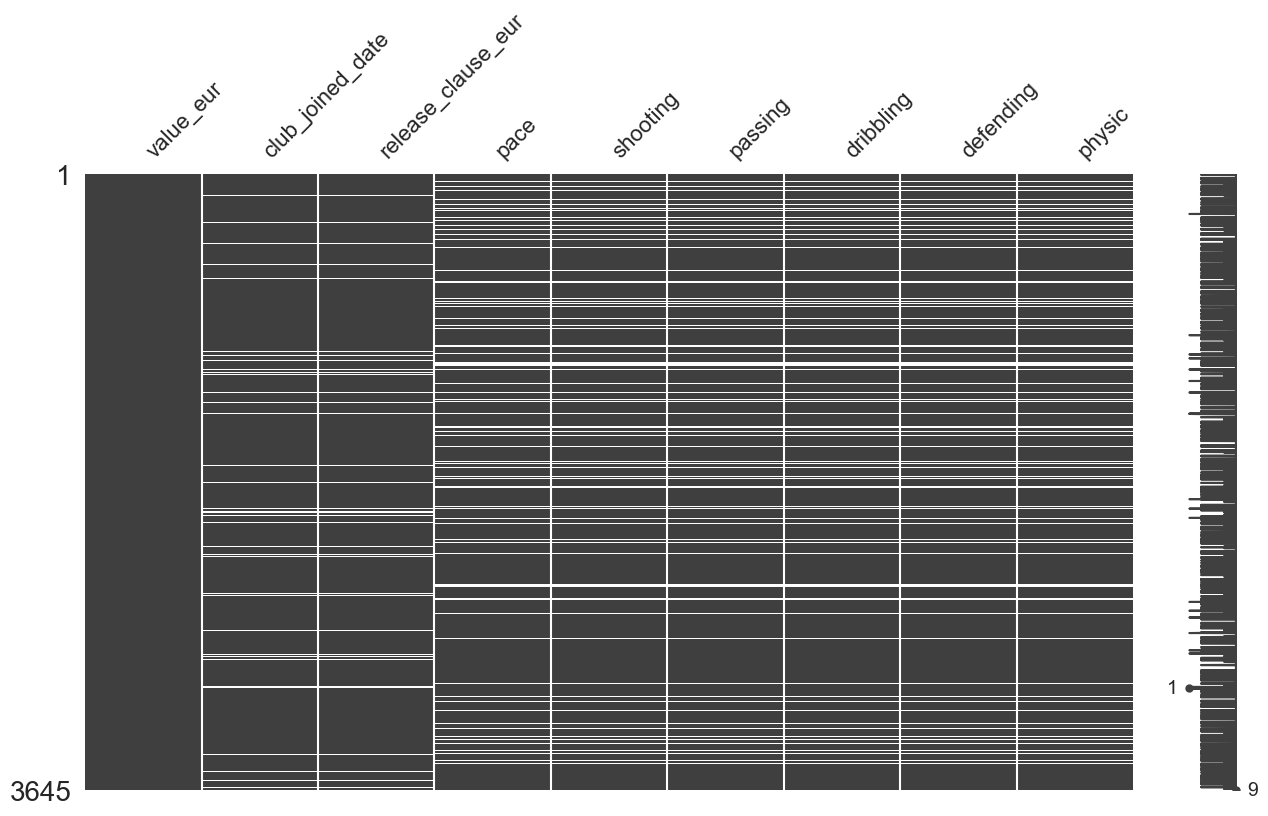

In [355]:
null_values_series = df_final.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string())
msno.matrix(df_final[null_values_series.index.tolist()], figsize=(15, 8));

In [356]:
missing_values_table(df_final)

El dataframe tiene 77 columnas.
Hay 9 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
pace,421,11.6
shooting,421,11.6
passing,421,11.6
dribbling,421,11.6
defending,421,11.6
physic,421,11.6
release_clause_eur,236,6.5
club_joined_date,234,6.4
value_eur,2,0.1


In [357]:
missing_df = missing_values_table(df_final);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')
df_final = df_final.drop(list(missing_columns), axis=1)

El dataframe tiene 77 columnas.
Hay 9 columnas que les faltan valores.
Se eliminan 0 columnas.
Son: []


In [358]:
df_final

,team_id,fifa_version,team_name,league_id,league_name,league_level,nationality_id,equipo_nationality_name,equipo_overall,attack,midfield,defence,international_prestige,domestic_prestige,starting_xi_average_age,whole_team_average_age,captain,player_id,short_name,long_name,player_positions,jugador_overall,potential,value_eur,wage_eur,age,dob,club_team_id,club_name,club_position,club_jersey_number,club_joined_date,jugador_nationality_name,skill_moves,international_reputation,work_rate,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,157804,S. Carson,Scott Carson,GK,65,65,80000.0,11000.0,36,1985-09-03,10.0,Manchester City,SUB,33.0,2021-07-20,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,263955,B. Knight,Ben Knight,RW,60,74,600000.0,12000.0,20,2002-06-14,10.0,Manchester City,RES,96.0,2019-06-14,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,264681,J. Wilson-Esbrand,Joshua Wilson-Esbrand,LB,58,76,500000.0,7000.0,19,2002-12-26,10.0,Manchester City,RES,97.0,2021-07-01,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,259677,A. Robertson,Alex Robertson,CM,58,78,575000.0,8000.0,19,2003-04-17,10.0,Manchester City,RES,93.0,2020-07-01,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,200159,S. Ortega,Stefan Ortega Moreno,GK,80,80,14500000.0,95000.0,29,1992-11-06,10.0,Manchester City,SUB,18.0,2022-07-01,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,244599,H. Guenouche,Hakim Guenouche,"LB, LM",60,71,525000.0,1000.0,22,2000-05-30,781.0,Austria Lustenau,LB,12.0,2021-07-14,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,258899,C. Türkmen,Cem Tuna Türkmen,"CDM, CM",62,72,825000.0,2000.0,20,2002-03-2

In [359]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   team_id                      3645 non-null   int64         
 1   fifa_version                 3645 non-null   int64         
 2   team_name                    3645 non-null   object        
 3   league_id                    3645 non-null   int64         
 4   league_name                  3645 non-null   object        
 5   league_level                 3645 non-null   float64       
 6   nationality_id               3645 non-null   int64         
 7   equipo_nationality_name      3645 non-null   object        
 8   equipo_overall               3645 non-null   int64         
 9   attack                       3645 non-null   int64         
 10  midfield                     3645 non-null   int64         
 11  defence                      3645 non-null 

In [360]:
num_equipos = df_final['team_id'].nunique()
print(num_equipos)

130


In [361]:
# # viualizacion con matplotlib de jugadores x liga
# plt.figure(figsize=(10,6))
# df_final['league_name'].value_counts().plot(kind='bar')
# plt.xlabel('Liga')
# plt.ylabel('Número de Jugadores')
# plt.title('Número de Jugadores por Liga')
# plt.savefig('resources/4.jugadores_x_liga.png', bbox_inches='tight')
# plt.show()

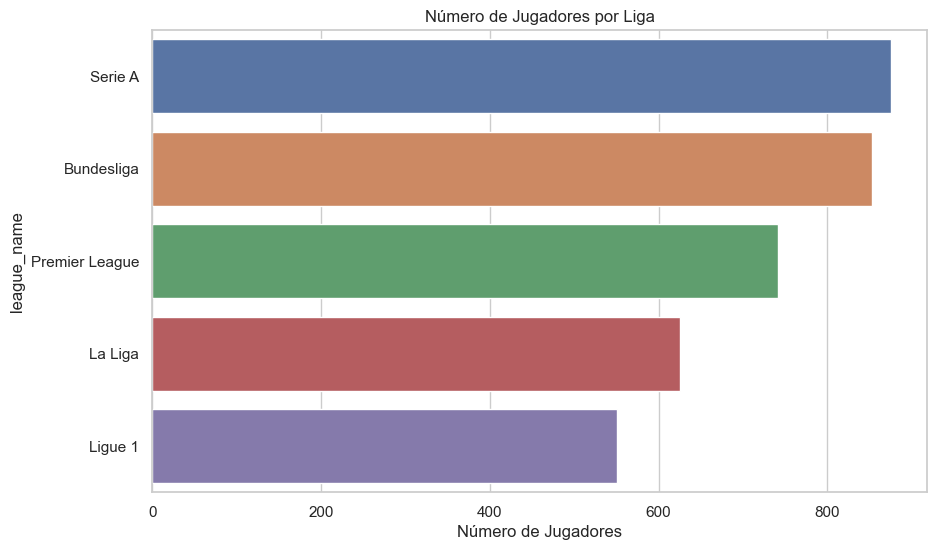

In [362]:
# viualizacion con seaborn de jugadores x liga
plt.figure(figsize=(10,6))
sns.countplot(y='league_name', data=df_final, order = df_final['league_name'].value_counts().index)
plt.xlabel('Número de Jugadores')
plt.title('Número de Jugadores por Liga')
plt.savefig('resources/4.jugadores_por_liga.png', bbox_inches='tight')
plt.show()

In [363]:
# jugadores x equipo con matplotlib
# plt.figure(figsize=(10,6))
# df_final['club_name'].value_counts()[:20].plot(kind='bar')
# plt.xlabel('Equipo')
# plt.ylabel('Número de Jugadores')
# plt.title('Número de Jugadores por Equipo (Top 20)')
# plt.savefig('resources/jugadoresxequipo.png', bbox_inches='tight')
# plt.show()

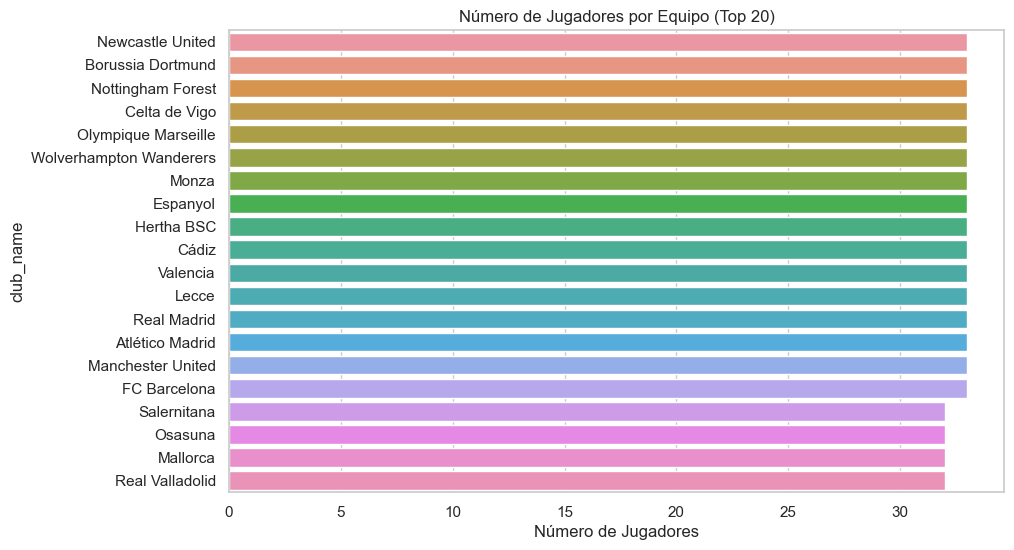

In [364]:
# jugadores x equipo con seaborn
plt.figure(figsize=(10,6))
sns.countplot(y='club_name', data=df_final, order=df_final['club_name'].value_counts().iloc[:20].index)
plt.xlabel('Número de Jugadores')
plt.title('Número de Jugadores por Equipo (Top 20)')
plt.savefig('resources/5.jugadores_por_equipo.png', bbox_inches='tight')
plt.show()

In [365]:
# visualizacion de jugadores por país
players_per_country = df_final.groupby('jugador_nationality_name').size()
fig = go.Figure(data=go.Choropleth(
    locations = players_per_country.index,
    z = players_per_country.values,
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = "Número de Jugadores",
))

fig.update_layout(
    title_text = 'Jugadores por país',
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)
pio.write_image(fig, 'resources/6.jugadores_por_pais.png')
fig.show()

In [366]:
df_final = df_final.rename(columns={
    'team_id': 'id_equipo',
    'fifa_version': 'version_fifa',
    'team_name': 'nombre_equipo',
    'league_id': 'id_liga',
    'league_name': 'nombre_liga',
    'league_level': 'nivel_liga',
    'nationality_id': 'id_nacionalidad_equipo',
    'equipo_nationality_name': 'nombre_nacionalidad_equipo',
    'equipo_overall': 'overall_equipo',
    'attack': 'ataque_equipo',
    'midfield': 'medio_campo_equipo',
    'defence': 'defensa_equipo',
    'international_prestige': 'prestigio_internacional_equipo',
    'domestic_prestige': 'prestigio_domestico_equipo',
    'starting_xi_average_age': 'edad_promedio_titulares_equipo',
    'whole_team_average_age': 'edad_promedio_equipo_equipo',
    'captain': 'capitan_equipo',
    'player_id': 'id_jugador',
    'short_name': 'apodo',
    'long_name': 'nombre_largo',
    'player_positions': 'posiciones_jugador',
    'jugador_overall': 'total_jugador',
    'potential': 'potencial_jugador',
    'value_eur': 'valor_eur',
    'wage_eur': 'salario_eur',
    'age': 'edad',
    'dob': 'fecha_nacimiento',
    'club_team_id': 'id_equipo_club',
    'club_name': 'nombre_club',
    'club_position': 'posicion_club',
    'club_jersey_number': 'numero_camiseta_club',
    'club_joined_date': 'fecha_union_club',
    'jugador_nationality_name': 'nombre_nacionalidad_jugador',
    'skill_moves': 'movimientos_habilidad',
    'international_reputation': 'reputacion_internacional',
    'work_rate': 'ritmo_trabajo',
    'release_clause_eur': 'clausula_rescision_eur',
    'pace': 'ritmo',
    'shooting': 'disparo',
    'passing': 'pase',
    'dribbling': 'regate',
    'defending': 'defensa',
    'physic': 'fisico',
    'attacking_crossing': 'cruce_ataque',
    'attacking_finishing': 'finalizacion_ataque',
    'attacking_heading_accuracy': 'precisión_cabeceo_ataque',
    'attacking_short_passing': 'pase_corto_ataque',
    'attacking_volleys': 'voleas_ataque',
    'skill_dribbling': 'habilidad_regate',
    'skill_curve': 'curva_habilidad',
    'skill_fk_accuracy': 'precisión_tiro_libre',
    'skill_long_passing': 'pase_largo',
    'skill_ball_control': 'control_balon',
    'movement_acceleration': 'aceleracion_movimiento',
    'movement_sprint_speed': 'velocidad_sprint_movimiento',
    'movement_agility': 'agilidad_movimiento',
    'movement_reactions': 'reacciones_movimiento',
    'movement_balance': 'equilibrio_movimiento',
    'power_shot_power': 'potencia_disparo',
    'power_jumping': 'salto_potencia',
    'power_stamina': 'resistencia_potencia',
    'power_strength': 'fuerza_potencia',
    'power_long_shots': 'disparos_largos_potencia',
    'mentality_aggression': 'agresión_mentalidad',
    'mentality_interceptions': 'intercepciones_mentalidad',
    'mentality_positioning': 'posicionamiento_mentalidad',
    'mentality_vision': 'visión_mentalidad',
    'mentality_penalties': 'penales_mentalidad',
    'mentality_composure': 'compostura_mentalidad',
    'defending_marking': 'marcaje_defensa',
    'defending_standing_tackle': 'tacle_pie_firme_defensa',
    'defending_sliding_tackle': 'tacle_deslizante_defensa',
    'goalkeeping_diving': 'portero_buceo',
    'goalkeeping_handling': 'portero_manejo',
    'goalkeeping_kicking': 'portero_pateo',
    'goalkeeping_positioning': 'portero_posicionamiento',
    'goalkeeping_reflexes': 'portero_reflejos',
    'player_traits': 'rasgos_jugador',
    'nation_position': 'posicion_nacion',
    'nation_jersey_number': 'numero_camiseta_nacion',
    'national_team_id': 'id_equipo_nacional',
    'national_team_name': 'nombre_equipo_nacional'
})
df_final

,id_equipo,version_fifa,nombre_equipo,id_liga,nombre_liga,nivel_liga,id_nacionalidad_equipo,nombre_nacionalidad_equipo,overall_equipo,ataque_equipo,medio_campo_equipo,defensa_equipo,prestigio_internacional_equipo,prestigio_domestico_equipo,edad_promedio_titulares_equipo,edad_promedio_equipo_equipo,capitan_equipo,id_jugador,apodo,nombre_largo,posiciones_jugador,total_jugador,potencial_jugador,valor_eur,salario_eur,edad,fecha_nacimiento,id_equipo_club,nombre_club,posicion_club,numero_camiseta_club,fecha_union_club,nombre_nacionalidad_jugador,movimientos_habilidad,reputacion_internacional,ritmo_trabajo,clausula_rescision_eur,ritmo,disparo,pase,regate,defensa,fisico,cruce_ataque,finalizacion_ataque,precisión_cabeceo_ataque,pase_corto_ataque,voleas_ataque,habilidad_regate,curva_habilidad,precisión_tiro_libre,pase_largo,control_balon,aceleracion_movimiento,velocidad_sprint_movimiento,agilidad_movimiento,reacciones_movimiento,equilibrio_movimiento,potencia_disparo,salto_potencia,resistencia_potencia,fuerza_potencia,disparos_largos_potencia,agresión_mentalidad,intercepciones_mentalidad,posicionamiento_mentalidad,visión_mentalidad,penales_mentalidad,compostura_mentalidad,defending_marking_awareness,tacle_pie_firme_defensa,tacle_deslizante_defensa,portero_buceo,portero_manejo,portero_pateo,portero_posicionamiento,portero_reflejos
0,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,157804,S. Carson,Scott Carson,GK,65,65,80000.0,11000.0,36,1985-09-03,10.0,Manchester City,SUB,33.0,2021-07-20,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,263955,B. Knight,Ben Knight,RW,60,74,600000.0,12000.0,20,2002-06-14,10.0,Manchester City,RES,96.0,2019-06-14,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,264681,J. Wilson-Esbrand,Joshua Wilson-Esbrand,LB,58,76,500000.0,7000.0,19,2002-12-26,10.0,Manchester City,RES,97.0,2021-07-01,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,259677,A. Robertson,Alex Robertson,CM,58,78,575000.0,8000.0,19,2003-04-17,10.0,Manchester City,RES,93.0,2020-07-01,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,10,23,Manchester City,13,Premier League,1.0,14,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,200159,S. Ortega,Stefan Ortega Moreno,GK,80,80,14500000.0,95000.0,29,1992-11-06,10.0,Manchester City,SUB,18.0,2022-07-01,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,244599,H. Guenouche,Hakim Guenouche,"LB, LM",60,71,525000.0,1000.0,22,2000-05-30,781.0,Austria Lustenau,LB,12.0,2021-07-14,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,781,23,Austria Lustenau,80,Bundesliga,1.0,4,Austria,63,65

In [367]:
unique_values = df_final.nunique()
single_value_columns = unique_values[unique_values == 1]
print(single_value_columns)

version_fifa    1
nivel_liga      1
dtype: int64


In [368]:
df_final= df_final.drop(['version_fifa', 'nivel_liga'], axis=1)

In [369]:
# Eliminar las columnas de ID
df_final = df_final.drop(['id_equipo', 'id_liga', 'id_nacionalidad_equipo', 'id_jugador', 'id_equipo_club'], axis=1)

In [370]:
df_final

,nombre_equipo,nombre_liga,nombre_nacionalidad_equipo,overall_equipo,ataque_equipo,medio_campo_equipo,defensa_equipo,prestigio_internacional_equipo,prestigio_domestico_equipo,edad_promedio_titulares_equipo,edad_promedio_equipo_equipo,capitan_equipo,apodo,nombre_largo,posiciones_jugador,total_jugador,potencial_jugador,valor_eur,salario_eur,edad,fecha_nacimiento,nombre_club,posicion_club,numero_camiseta_club,fecha_union_club,nombre_nacionalidad_jugador,movimientos_habilidad,reputacion_internacional,ritmo_trabajo,clausula_rescision_eur,ritmo,disparo,pase,regate,defensa,fisico,cruce_ataque,finalizacion_ataque,precisión_cabeceo_ataque,pase_corto_ataque,voleas_ataque,habilidad_regate,curva_habilidad,precisión_tiro_libre,pase_largo,control_balon,aceleracion_movimiento,velocidad_sprint_movimiento,agilidad_movimiento,reacciones_movimiento,equilibrio_movimiento,potencia_disparo,salto_potencia,resistencia_potencia,fuerza_potencia,disparos_largos_potencia,agresión_mentalidad,intercepciones_mentalidad,posicionamiento_mentalidad,visión_mentalidad,penales_mentalidad,compostura_mentalidad,defending_marking_awareness,tacle_pie_firme_defensa,tacle_deslizante_defensa,portero_buceo,portero_manejo,portero_pateo,portero_posicionamiento,portero_reflejos
0,Manchester City,Premier League,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,S. Carson,Scott Carson,GK,65,65,80000.0,11000.0,36,1985-09-03,Manchester City,SUB,33.0,2021-07-20,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,Manchester City,Premier League,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,B. Knight,Ben Knight,RW,60,74,600000.0,12000.0,20,2002-06-14,Manchester City,RES,96.0,2019-06-14,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,Manchester City,Premier League,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,J. Wilson-Esbrand,Joshua Wilson-Esbrand,LB,58,76,500000.0,7000.0,19,2002-12-26,Manchester City,RES,97.0,2021-07-01,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,Manchester City,Premier League,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,A. Robertson,Alex Robertson,CM,58,78,575000.0,8000.0,19,2003-04-17,Manchester City,RES,93.0,2020-07-01,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,Manchester City,Premier League,England,85,85,86,86,10,10.0,27.09,25.88,186942.0,S. Ortega,Stefan Ortega Moreno,GK,80,80,14500000.0,95000.0,29,1992-11-06,Manchester City,SUB,18.0,2022-07-01,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,Austria Lustenau,Bundesliga,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,H. Guenouche,Hakim Guenouche,"LB, LM",60,71,525000.0,1000.0,22,2000-05-30,Austria Lustenau,LB,12.0,2021-07-14,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,Austria Lustenau,Bundesliga,Austria,63,65,64,62,1,2.0,23.64,22.83,269447.0,C. Türkmen,Cem Tuna Türkmen,"CDM, CM",62,72,825000.0,2000.0,20,2002-03-29,Austria Lustenau,LDM,8.0,NaT,Turkey,2,1,Medium/Medium,NaN,58.0,43.0,58.0,67.0,57.0,56.0,49,41,50,70,42,68,39,37,62,68,63,54,69,57,69,54,55,72,48,39,57,55,46,51,40,49.0,60,58,58,10,8,11,6,6
3642,Au

In [371]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   nombre_equipo                   3645 non-null   object        
 1   nombre_liga                     3645 non-null   object        
 2   nombre_nacionalidad_equipo      3645 non-null   object        
 3   overall_equipo                  3645 non-null   int64         
 4   ataque_equipo                   3645 non-null   int64         
 5   medio_campo_equipo              3645 non-null   int64         
 6   defensa_equipo                  3645 non-null   int64         
 7   prestigio_internacional_equipo  3645 non-null   int64         
 8   prestigio_domestico_equipo      3645 non-null   float64       
 9   edad_promedio_titulares_equipo  3645 non-null   float64       
 10  edad_promedio_equipo_equipo     3645 non-null   float64       
 11  capi

## 3.4 Ingeniería de características

In [372]:
df_encoded = df_final.copy()
eliminar = ['nombre_equipo', 'nombre_liga', 'nombre_nacionalidad_equipo', 'fecha_nacimiento','apodo','nombre_club','posicion_club', 'numero_camiseta_club', 'fecha_union_club', 'edad_promedio_titulares_equipo', 'capitan_equipo', 'posiciones_jugador']
df_encoded = df_encoded.drop(columns=eliminar, axis=1)
df_encoded

,overall_equipo,ataque_equipo,medio_campo_equipo,defensa_equipo,prestigio_internacional_equipo,prestigio_domestico_equipo,edad_promedio_equipo_equipo,nombre_largo,total_jugador,potencial_jugador,valor_eur,salario_eur,edad,nombre_nacionalidad_jugador,movimientos_habilidad,reputacion_internacional,ritmo_trabajo,clausula_rescision_eur,ritmo,disparo,pase,regate,defensa,fisico,cruce_ataque,finalizacion_ataque,precisión_cabeceo_ataque,pase_corto_ataque,voleas_ataque,habilidad_regate,curva_habilidad,precisión_tiro_libre,pase_largo,control_balon,aceleracion_movimiento,velocidad_sprint_movimiento,agilidad_movimiento,reacciones_movimiento,equilibrio_movimiento,potencia_disparo,salto_potencia,resistencia_potencia,fuerza_potencia,disparos_largos_potencia,agresión_mentalidad,intercepciones_mentalidad,posicionamiento_mentalidad,visión_mentalidad,penales_mentalidad,compostura_mentalidad,defending_marking_awareness,tacle_pie_firme_defensa,tacle_deslizante_defensa,portero_buceo,portero_manejo,portero_pateo,portero_posicionamiento,portero_reflejos
0,85,85,86,86,10,10.0,25.88,Scott Carson,65,65,80000.0,11000.0,36,England,1,2,Medium/Medium,148000.0,NaN,NaN,NaN,NaN,NaN,NaN,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,85,85,86,86,10,10.0,25.88,Ben Knight,60,74,600000.0,12000.0,20,England,3,1,Medium/Medium,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,85,85,86,86,10,10.0,25.88,Joshua Wilson-Esbrand,58,76,500000.0,7000.0,19,England,2,1,High/Medium,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,85,85,86,86,10,10.0,25.88,Alex Robertson,58,78,575000.0,8000.0,19,England,2,1,Medium/Medium,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,85,85,86,86,10,10.0,25.88,Stefan Ortega Moreno,80,80,14500000.0,95000.0,29,Germany,1,1,Medium/Medium,26800000.0,NaN,NaN,NaN,NaN,NaN,NaN,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,63,65,64,62,1,2.0,22.83,Hakim Guenouche,60,71,525000.0,1000.0,22,France,2,1,High/Medium,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,63,65,64,62,1,2.0,22.83,Cem Tuna Türkmen,62,72,825000.0,2000.0,20,Turkey,2,1,Medium/Medium,NaN,58.0,43.0,58.0,67.0,57.0,56.0,49,41,50,70,42,68,39,37,62,68,63,54,69,57,69,54,55,72,48,39,57,55,46,51,40,49.0,60,58,58,10,8,11,6,6
3642,63,65,64,62,1,2.0,22.83,Hannes Küng,57,72,375000.0,750.0,19,Austria,2,1,Medium/Medium,778000.0,56.0,26.0,36.0,39.0,58.0,63.0,27,24,50,44,26,32,25,29,38,42,61,52,45,51,54,38,68,59,73,19,43,55,21,32,33,39.0,60,62,56,10,12,12,8,5
3643,63,65,64,62,1,2.0,22.83,Bryan Silva Teixeira,67,73,1600000.0,3000.0,21,Cape Verde Islands,3,1,High/Medium,2600000.0,75.0,62.0,62.0,71.0,47.0,59.0,58,58,51,66,57,73,56,45,61,69,76,74,73,56,82,69,52,58,60,65,61,41,65,67,53,62.0,39,55,53,15,12,14,7,10


In [373]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   overall_equipo                  3645 non-null   int64  
 1   ataque_equipo                   3645 non-null   int64  
 2   medio_campo_equipo              3645 non-null   int64  
 3   defensa_equipo                  3645 non-null   int64  
 4   prestigio_internacional_equipo  3645 non-null   int64  
 5   prestigio_domestico_equipo      3645 non-null   float64
 6   edad_promedio_equipo_equipo     3645 non-null   float64
 7   nombre_largo                    3645 non-null   object 
 8   total_jugador                   3645 non-null   int64  
 9   potencial_jugador               3645 non-null   int64  
 10  valor_eur                       3643 non-null   float64
 11  salario_eur                     3645 non-null   float64
 12  edad                            36

In [374]:
# obtenemos el df codificado
df_encoded.describe()

,overall_equipo,ataque_equipo,medio_campo_equipo,defensa_equipo,prestigio_internacional_equipo,prestigio_domestico_equipo,edad_promedio_equipo_equipo,total_jugador,potencial_jugador,valor_eur,salario_eur,edad,movimientos_habilidad,reputacion_internacional,clausula_rescision_eur,ritmo,disparo,pase,regate,defensa,fisico,cruce_ataque,finalizacion_ataque,precisión_cabeceo_ataque,pase_corto_ataque,voleas_ataque,habilidad_regate,curva_habilidad,precisión_tiro_libre,pase_largo,control_balon,aceleracion_movimiento,velocidad_sprint_movimiento,agilidad_movimiento,reacciones_movimiento,equilibrio_movimiento,potencia_disparo,salto_potencia,resistencia_potencia,fuerza_potencia,disparos_largos_potencia,agresión_mentalidad,intercepciones_mentalidad,posicionamiento_mentalidad,visión_mentalidad,penales_mentalidad,compostura_mentalidad,defending_marking_awareness,tacle_pie_firme_defensa,tacle_deslizante_defensa,portero_buceo,portero_manejo,portero_pateo,portero_posicionamiento,portero_reflejos
count,3645.00000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3.643000e+03,3645.000000,3645.000000,3645.000000,3645.000000,3.409000e+03,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000,3645.000000
mean,75.21893,75.665569,75.141838,74.690261,3.909465,5.221125,25.115004,71.613443,76.583539,8.893822e+06,27571.879287,25.250206,2.541838,1.308642,1.748449e+07,69.714950,57.703784,63.567308,68.324132,57.019851,67.194789,54.573937,50.291907,55.912757,64.856516,46.968450,61.204938,52.826063,46.857613,59.002469,64.210425,66.051578,66.300137,65.110288,68.209602,64.868313,63.314952,66.269684,64.770919,66.892455,51.646914,59.581619,51.429630,54.757202,59.598628,51.105350,64.396982,51.099588,52.781893,50.233196,17.243896,17.005487,16.959396,17.093827,17.498765
std,4.55167,4.636316,4.734373,4.552695,2.616449,2.826087,1.389300,7.109894,5.650977,1.502034e+07,36307.181244,4.681919,0.878589,0.644528,2.974813e+07,11.285908,14.543035,10.050252,9.611961,17.794329,9.956867,19.770065,21.436331,19.175387,15.593350,19.705776,20.492723,19.823589,18.586826,15.789947,18.070295,15.260546,15.152370,14.988686,9.466821,14.908583,13.046047,12.302980,16.660652,12.629286,20.956063,18.019420,22.801157,21.745434,14.522077,16.947112,12.573260,22.571686,23.556816,23.111787,19.621040,18.838617,18.490689,19.102013,20.047811
min,63.00000,64.000000,64.000000,62.000000,1.000000,1.000000,21.860000,50.000000,58.000000,4.500000e+04,500.000000,16.000000,1.000000,1.000000,8.600000e+04,30.000000,21.000000,28.000000,30.000000,16.000000,30.000000,6.000000,3.000000,5.000000,11.000000,3.000000,5.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,21.000000,35.000000,20.000000,18.000000,30.000000,16.000000,25.000000,4.000000,11.000000,3.000000,3.000000,10.000000,8.000000,19.000000,4.000000,7.000000,7.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,73.00000,73.000000,72.000000,72.000000,1.000000,3.000000,24.120000,67.000000,73.000000,1.300000e+06,5000.000000,22.000000,2.000000,1.000000,2.500000e+06,63.000000,47.000000,57.000000,63.000000,41.000000,61.000000,43.000000,34.000000,48.000000,61.000000,33.000000,57.000000,41.000000,35.000000,51.000000,61.000000,58.000000,58.000000,56.000000,62.000000,56.000000,54.000000,59.000000,56.000000,59.000000,38.000000,48.000000,29.000000,42.000000,50.000000,41.000000,58.000000,31.000000,31.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,75.00000,76.000000,75.000000,75.000000,4.000000,5.000000,24.940000,73.000000,77.000000,3.100000e+06,17000.000000,25.000000,3.000000,1.000000,6.10

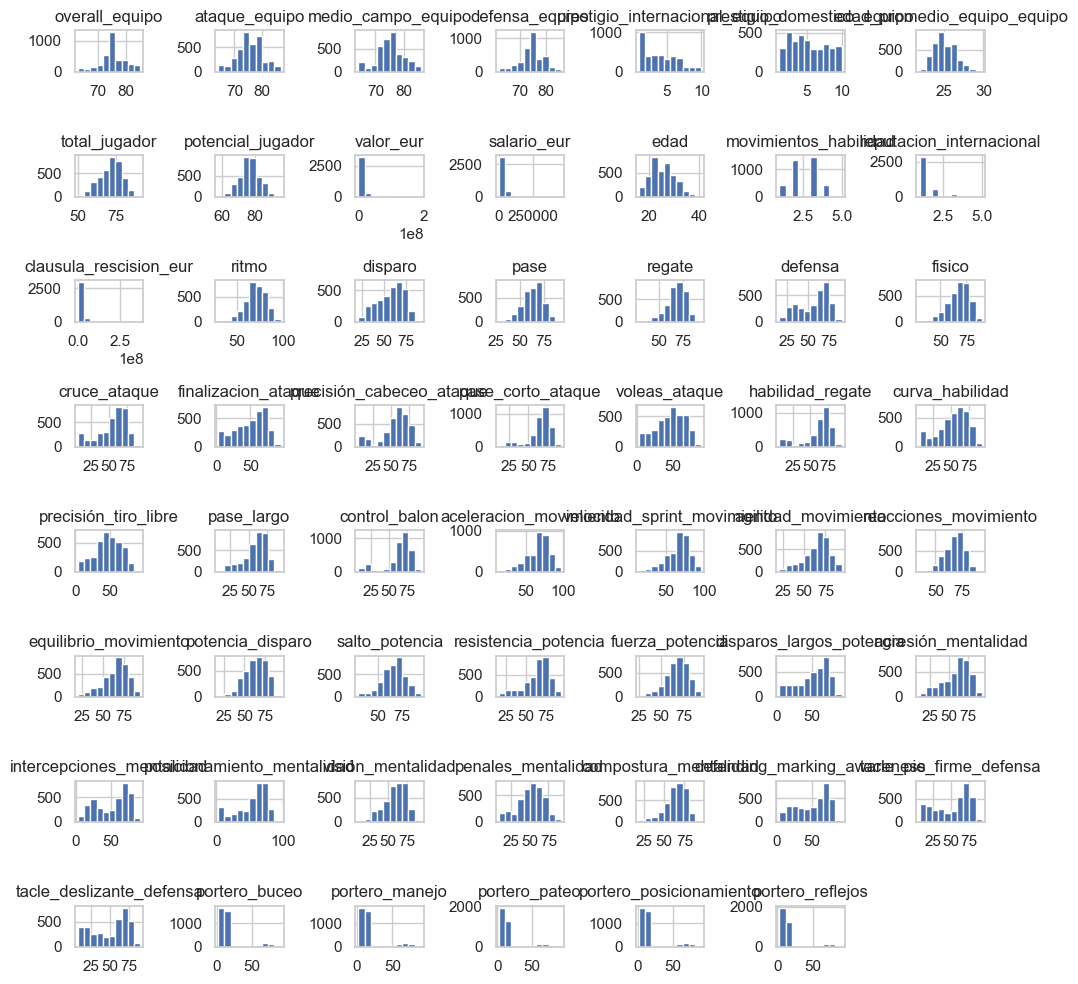

In [375]:
# Gráficos de histogramas para variables numéricas
df_encoded.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_64997/134268805.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



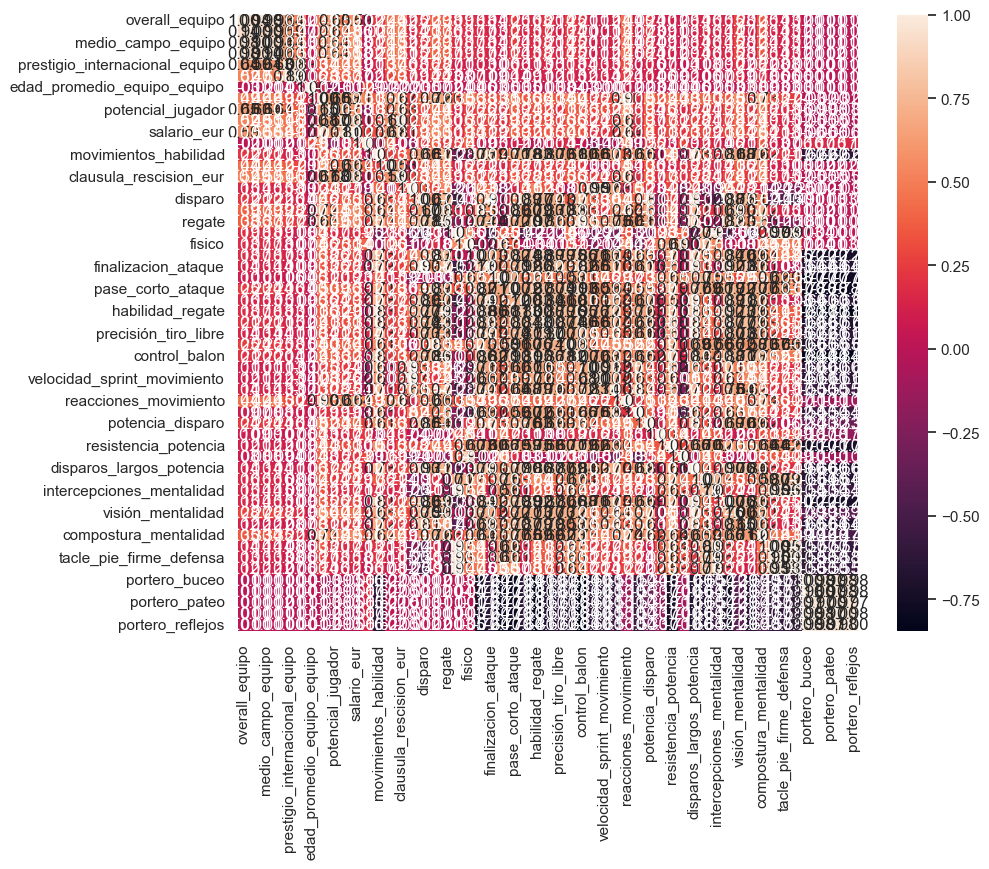

In [376]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.show()

In [377]:
# Verificando datos faltantes
print("Datos faltantes:")
print(df_encoded.isnull().sum())

# Verificando duplicados
print("Duplicados:")
print(df_encoded.duplicated().sum())

Datos faltantes:
overall_equipo                      0
ataque_equipo                       0
medio_campo_equipo                  0
defensa_equipo                      0
prestigio_internacional_equipo      0
prestigio_domestico_equipo          0
edad_promedio_equipo_equipo         0
nombre_largo                        0
total_jugador                       0
potencial_jugador                   0
valor_eur                           2
salario_eur                         0
edad                                0
nombre_nacionalidad_jugador         0
movimientos_habilidad               0
reputacion_internacional            0
ritmo_trabajo                       0
clausula_rescision_eur            236
ritmo                             421
disparo                           421
pase                              421
regate                            421
defensa                           421
fisico                            421
cruce_ataque                        0
finalizacion_ataque              

In [378]:
data_types = df_encoded.dtypes

for column, data_type in data_types.iteritems():
    print(f"Columna: {column} - Tipo de dato: {data_type}")

Columna: overall_equipo - Tipo de dato: int64
Columna: ataque_equipo - Tipo de dato: int64
Columna: medio_campo_equipo - Tipo de dato: int64
Columna: defensa_equipo - Tipo de dato: int64
Columna: prestigio_internacional_equipo - Tipo de dato: int64
Columna: prestigio_domestico_equipo - Tipo de dato: float64
Columna: edad_promedio_equipo_equipo - Tipo de dato: float64
Columna: nombre_largo - Tipo de dato: object
Columna: total_jugador - Tipo de dato: int64
Columna: potencial_jugador - Tipo de dato: int64
Columna: valor_eur - Tipo de dato: float64
Columna: salario_eur - Tipo de dato: float64
Columna: edad - Tipo de dato: int64
Columna: nombre_nacionalidad_jugador - Tipo de dato: object
Columna: movimientos_habilidad - Tipo de dato: int64
Columna: reputacion_internacional - Tipo de dato: int64
Columna: ritmo_trabajo - Tipo de dato: object
Columna: clausula_rescision_eur - Tipo de dato: float64
Columna: ritmo - Tipo de dato: float64
Columna: disparo - Tipo de dato: float64
Columna: pase - 

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_64997/2563941569.py:3: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [379]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   overall_equipo                  3645 non-null   int64  
 1   ataque_equipo                   3645 non-null   int64  
 2   medio_campo_equipo              3645 non-null   int64  
 3   defensa_equipo                  3645 non-null   int64  
 4   prestigio_internacional_equipo  3645 non-null   int64  
 5   prestigio_domestico_equipo      3645 non-null   float64
 6   edad_promedio_equipo_equipo     3645 non-null   float64
 7   nombre_largo                    3645 non-null   object 
 8   total_jugador                   3645 non-null   int64  
 9   potencial_jugador               3645 non-null   int64  
 10  valor_eur                       3643 non-null   float64
 11  salario_eur                     3645 non-null   float64
 12  edad                            36

In [380]:
# columnas con  faltantes
columnas_con_nan = ['valor_eur', 'clausula_rescision_eur', 'ritmo', 'disparo', 'pase', 'regate', 'defensa', 'fisico']

for columna in columnas_con_nan:
    mediana = df_encoded[columna].median()
    # llenamos los valores faltantes con la mediana
    df_encoded[columna].fillna(mediana, inplace=True)

In [381]:
# elimino las clumnas del equipo ya que no son útiles ahora
eliminar = ['overall_equipo', 'ataque_equipo', 'medio_campo_equipo', 'defensa_equipo','prestigio_internacional_equipo','prestigio_domestico_equipo','edad_promedio_equipo_equipo', 'nombre_largo', 'nombre_nacionalidad_jugador', 'ritmo_trabajo']
df_encoded = df_encoded.drop(columns=eliminar,  axis=1)
df_encoded

,total_jugador,potencial_jugador,valor_eur,salario_eur,edad,movimientos_habilidad,reputacion_internacional,clausula_rescision_eur,ritmo,disparo,pase,regate,defensa,fisico,cruce_ataque,finalizacion_ataque,precisión_cabeceo_ataque,pase_corto_ataque,voleas_ataque,habilidad_regate,curva_habilidad,precisión_tiro_libre,pase_largo,control_balon,aceleracion_movimiento,velocidad_sprint_movimiento,agilidad_movimiento,reacciones_movimiento,equilibrio_movimiento,potencia_disparo,salto_potencia,resistencia_potencia,fuerza_potencia,disparos_largos_potencia,agresión_mentalidad,intercepciones_mentalidad,posicionamiento_mentalidad,visión_mentalidad,penales_mentalidad,compostura_mentalidad,defending_marking_awareness,tacle_pie_firme_defensa,tacle_deslizante_defensa,portero_buceo,portero_manejo,portero_pateo,portero_posicionamiento,portero_reflejos
0,65,65,80000.0,11000.0,36,1,2,148000.0,71.0,60.0,64.0,69.0,62.0,69.0,14,19,18,25,13,17,18,16,17,20,33,37,38,61,42,47,72,28,70,20,23,19,11,44,20,38.0,10,15,20,63,65,62,69,63
1,60,74,600000.0,12000.0,20,3,1,1500000.0,69.0,57.0,52.0,68.0,28.0,43.0,55,59,41,53,53,68,50,50,41,65,72,66,84,43,89,64,43,41,46,49,37,29,54,58,57,52.0,22,29,30,12,9,6,10,11
2,58,76,500000.0,7000.0,19,2,1,1200000.0,75.0,32.0,45.0,59.0,54.0,54.0,53,28,50,46,28,63,37,37,38,50,77,73,62,55,82,34,62,56,51,32,58,53,53,43,45,44.0,50,59,58,5,15,12,5,8
3,58,78,575000.0,8000.0,19,2,1,1600000.0,67.0,47.0,57.0,61.0,50.0,50.0,44,36,55,67,44,61,49,42,66,62,69,66,58,60,76,64,59,53,42,47,63,43,63,49,55,51.0,50,49,57,12,8,14,5,5
4,80,80,14500000.0,95000.0,29,1,1,26800000.0,71.0,60.0,64.0,69.0,62.0,69.0,18,15,20,40,13,20,16,12,55,38,51,53,42,80,54,65,77,33,73,12,29,27,10,66,24,59.0,29,12,15,76,74,86,80,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,60,71,525000.0,1000.0,22,2,1,866000.0,84.0,31.0,48.0,65.0,51.0,52.0,54,31,45,51,25,63,53,30,43,62,82,86,89,47,88,30,53,78,40,26,50,49,45,46,41,42.0,51,54,51,11,14,13,7,12
3641,62,72,825000.0,2000.0,20,2,1,6100000.0,58.0,43.0,58.0,67.0,57.0,56.0,49,41,50,70,42,68,39,37,62,68,63,54,69,57,69,54,55,72,48,39,57,55,46,51,40,49.0,60,58,58,10,8,11,6,6
3642,57,72,375000.0,750.0,19,2,1,778000.0,56.0,26.0,36.0,39.0,58.0,63.0,27,24,50,44,26,32,25,29,38,42,61,52,45,51,54,38,68,59,73,19,43,55,21,32,33,39.0,60,62,56,10,12,12,8,5
3643,67,73,1600000.0,3000.0,21,3,1,2600000.0,75.0,62.0,62.0,71.0,47.0,59.0,58,58,51,66,57,73,56,45,61,69,76,74,73,56,82,69,52,58,60,65,61,41,65,67,53,62.0,39,55,53,15,12,14,7,10


In [382]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3645 entries, 0 to 3644
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_jugador                3645 non-null   int64  
 1   potencial_jugador            3645 non-null   int64  
 2   valor_eur                    3645 non-null   float64
 3   salario_eur                  3645 non-null   float64
 4   edad                         3645 non-null   int64  
 5   movimientos_habilidad        3645 non-null   int64  
 6   reputacion_internacional     3645 non-null   int64  
 7   clausula_rescision_eur       3645 non-null   float64
 8   ritmo                        3645 non-null   float64
 9   disparo                      3645 non-null   float64
 10  pase                         3645 non-null   float64
 11  regate                       3645 non-null   float64
 12  defensa                      3645 non-null   float64
 13  fisico            

In [383]:
len(df_encoded.total_jugador.value_counts())

42

In [384]:
df_encoded.total_jugador.min()

50

In [385]:
df_encoded.total_jugador.max()

91

In [386]:
print(f"Finalmente hay {len(df_encoded)} jugadores en el datset.")

Finalmente hay 3645 jugadores en el datset.


## Fase 4: Modelado

In [387]:
modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

X = df_encoded.drop('total_jugador', axis=1)
# variable obj
y = df_encoded['total_jugador']

# division del conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

# validacion cruzada
for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el  modelo con mejor score
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score                           Mejores Parámetros
0  LinearRegression     0.942598                                           {}
1      DecisionTree     0.975491                            {'max_depth': 12}
2      RandomForest     0.990866       {'max_depth': 12, 'n_estimators': 300}
3               KNN     0.885428                           {'n_neighbors': 7}
4  GradientBoosting     0.989920  {'learning_rate': 0.1, 'n_estimators': 200}
5           XGBoost     0.991890  {'learning_rate': 0.1, 'n_estimators': 200}

El mejor modelo es: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max

['mejor_modelo.joblib']

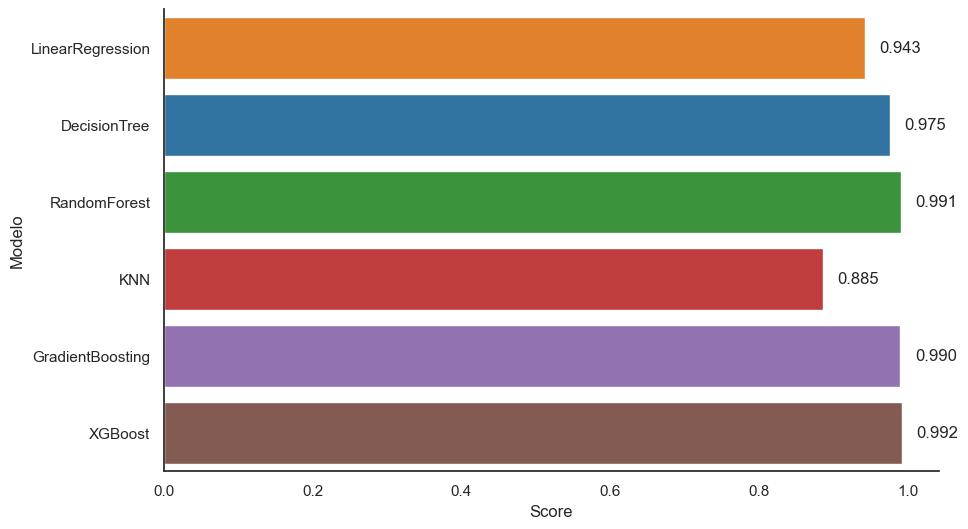

In [388]:
# score de los modelos x seaborn
sns.set(style="white")
colores = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Mejor Score', y='Modelo', data=df_resultados, palette=colores)

# Mostrar los valores en cada barra
for i, p in enumerate(ax.patches):
    score = format(p.get_width(), '.3f')
    x = p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2.
    ax.annotate(score, (x, y), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.xlabel("Score")
sns.despine()
plt.savefig('resources/6.models_scores.png', bbox_inches='tight')
plt.show()

## Fase 5: Evaluación

### 5.1 Evaluación de los datos de prueba

In [389]:
# Predicción con los datos de prueba con el mejor mmodelo
y_pred = mejor_modelo.predict(X_test)

In [390]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE
rmse = np.sqrt(mse)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 0.3417354476340034
RMSE: 0.5845814294296419
R^2: 0.9933978775305107


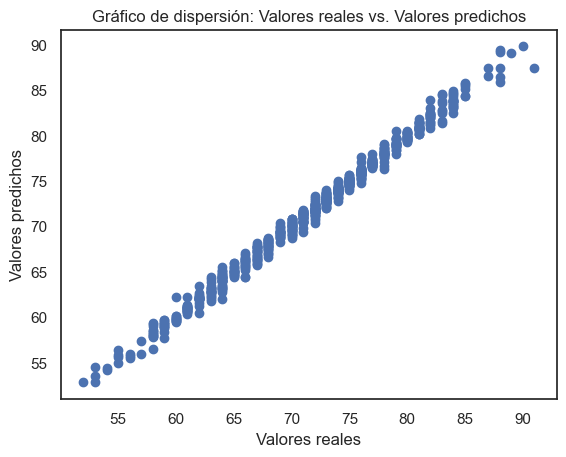

In [391]:
# visualizacion graf dispersion con matplotlib
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Gráfico de dispersión: Valores reales vs. Valores predichos')
plt.savefig('resources/7.grafico_dispersion.png', bbox_inches='tight')
plt.show()

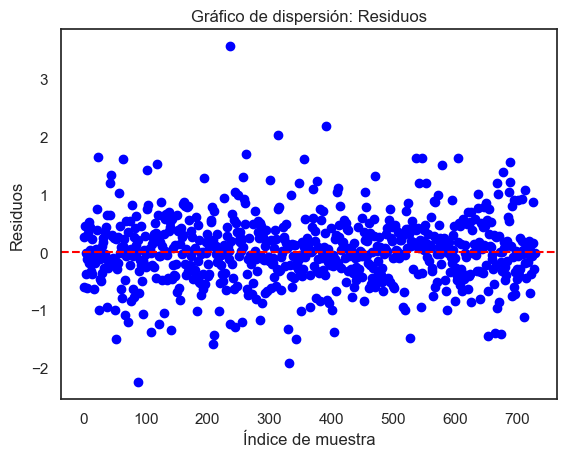

In [392]:
# visualizacion residuos graf dispersion con matplotlib
residuos = y_test - y_pred
plt.scatter(range(len(residuos)), residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión: Residuos')
plt.savefig('resources/8.residuos.png', bbox_inches='tight')
plt.show()

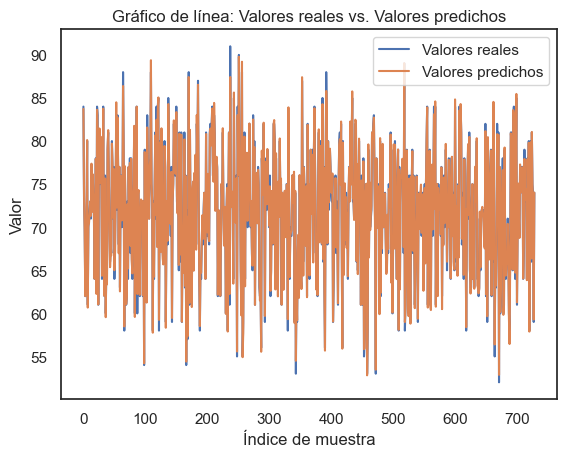

<Figure size 640x480 with 0 Axes>

In [393]:
# visualizacion predicciones con matplotlib
plt.plot(range(len(y_test)), y_test, label='Valores reales')
plt.plot(range(len(y_pred)), y_pred, label='Valores predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Gráfico de línea: Valores reales vs. Valores predichos')
plt.legend()
plt.savefig('resources/9.prediccion_valores.png', bbox_inches='tight')
plt.show()

### 5.2 Importancia características

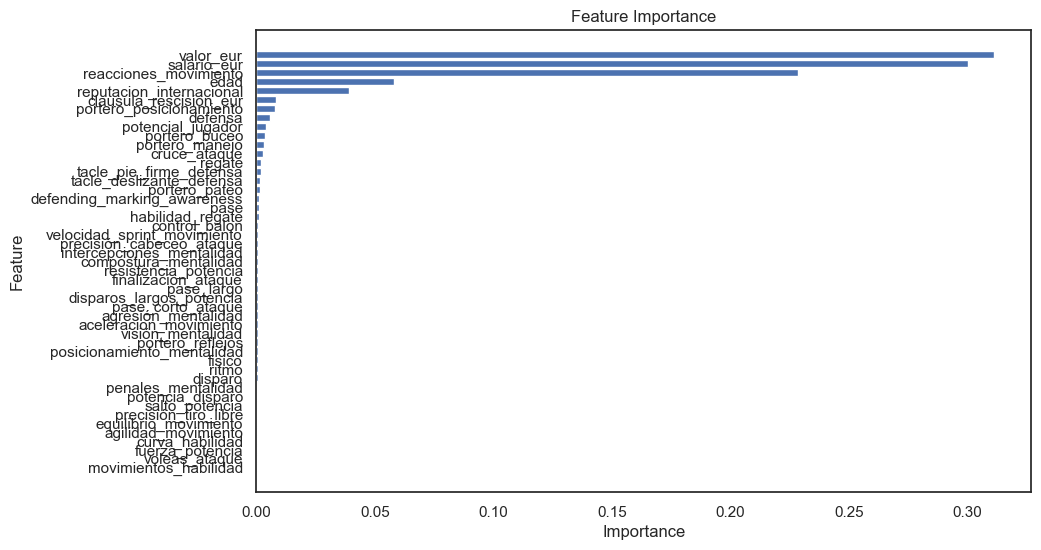

In [394]:
best_grid = load('mejor_modelo.joblib')
selected_model = best_grid.best_estimator_

if hasattr(selected_model, 'feature_importances_'):
    features = X_train.columns
    importances = selected_model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importances = feature_importances.sort_values('Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.savefig('resources/10.caracteristicas_modelo.png', bbox_inches='tight')
    plt.show()
else:
    print(f"El modelo {type(selected_model).__name__} no tiene el atributo 'feature_importances_'.")

### 5.3 Predicción

In [395]:
# Realiza la predicción de las probabilidades
valores_predichos = mejor_modelo.predict(X)
# DataFrame con los valores predichos y otras columnas de interés
df_predicciones = pd.DataFrame(valores_predichos, columns=['total_jugador'])
df_predicciones['jugador_nombre'] = df_final['apodo']
df_predicciones['equipo_nombre'] = df_final['nombre_equipo']
df_predicciones['jugador_nacionalidad'] = df_final['nombre_nacionalidad_jugador']
df_predicciones.sort_values('total_jugador', ascending=False, inplace=True)

df_predicciones

,total_jugador,jugador_nombre,equipo_nombre,jugador_nacionalidad
50,91.010521,L. Messi,Paris Saint Germain,Argentina
83,90.990463,K. Benzema,Real Madrid,France
200,90.984787,R. Lewandowski,FC Barcelona,Poland
22,90.898804,K. De Bruyne,Manchester City,Belgium
261,90.009308,Cristiano Ronaldo,Manchester United,Portugal
...,...,...,...,...
3577,52.174641,T. Geris,Wattens,Austria
909,52.013145,O. Tipton,Wolverhampton Wanderers,England
3013,51.098495,D. Ciezkowski,Cremonese,Poland
3346,51.070477,K. Thuntsane,Orlando Pirates,South Africa


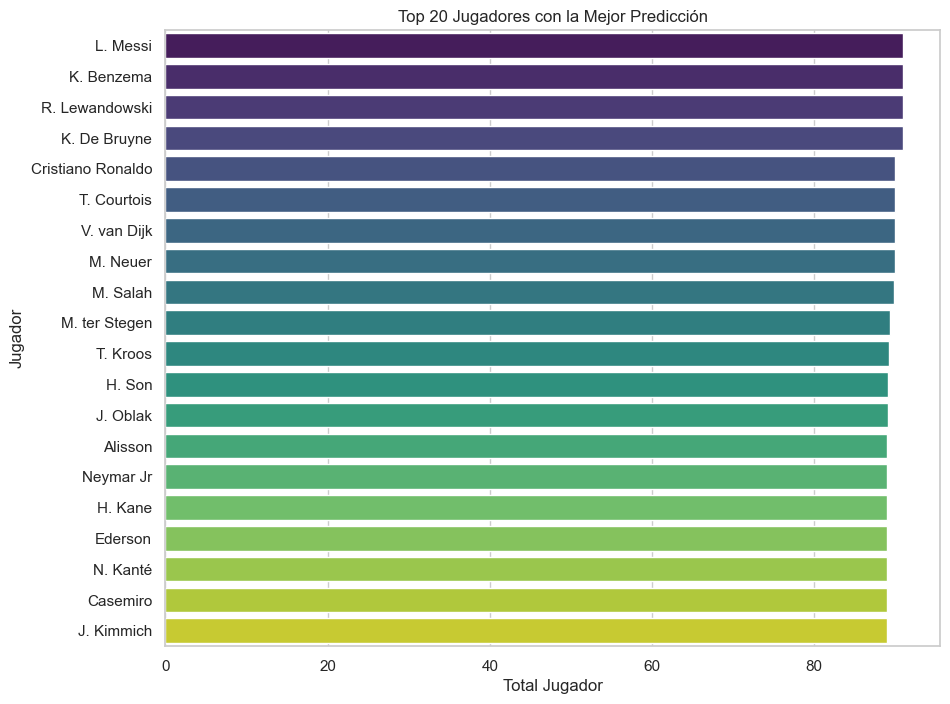

In [396]:
# 20 jugadores con la mejor predicción
top_jugadores = df_predicciones.head(20)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='total_jugador', y='jugador_nombre', data=top_jugadores, palette='viridis')
plt.xlabel('Total Jugador')
plt.ylabel('Jugador')
plt.title('Top 20 Jugadores con la Mejor Predicción')
plt.savefig('resources/11.prediccion_top20_jugadores.png', bbox_inches='tight')
plt.show()

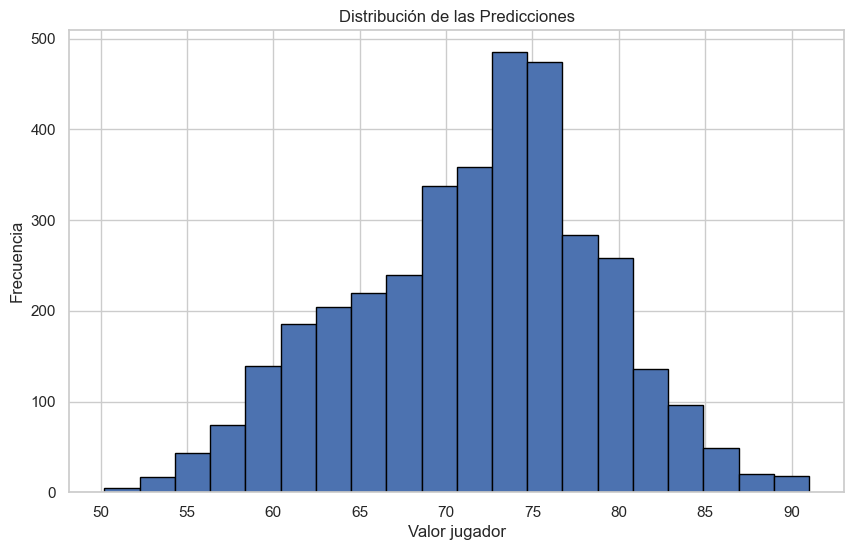

In [397]:
# Histograma de las predicciones de valor total_jugador
plt.figure(figsize=(10, 6))
plt.hist(df_predicciones['total_jugador'], bins=20, edgecolor='black')
plt.xlabel('Valor jugador')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Predicciones')
plt.savefig('resources/12.predcion_distribuciones.png', bbox_inches='tight')
plt.show()

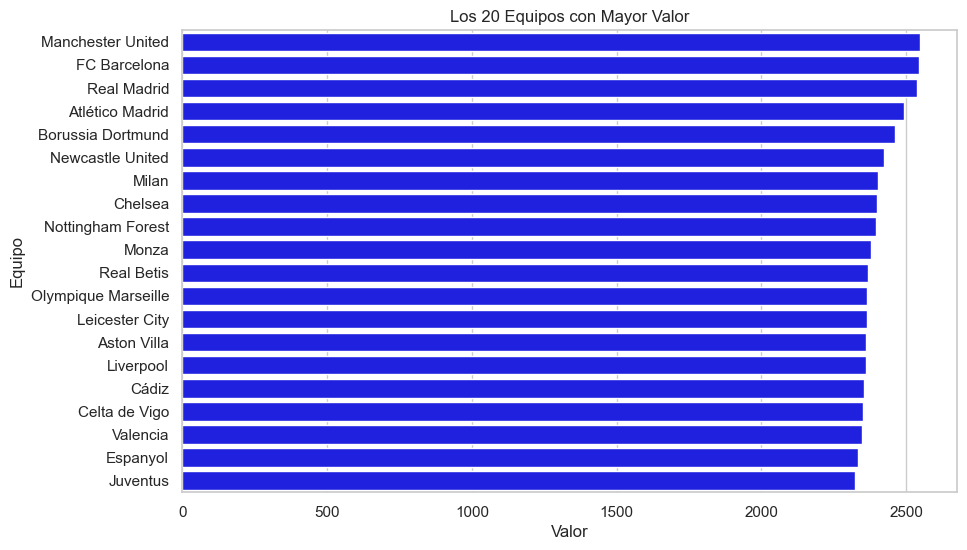

In [398]:
# visualizar los 20 equipos con mayor valor total_jugador
df_equipos = df_predicciones.groupby('equipo_nombre')['total_jugador'].sum().reset_index()
df_equipos = df_equipos.sort_values('total_jugador', ascending=False)
top_20_equipos = df_equipos.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='equipo_nombre', data=top_20_equipos, color='blue')
plt.xlabel('Valor')
plt.ylabel('Equipo')
plt.title('Los 20 Equipos con Mayor Valor')
plt.savefig('resources/13.prediccion_top20_equipos.png', bbox_inches='tight')
plt.show()

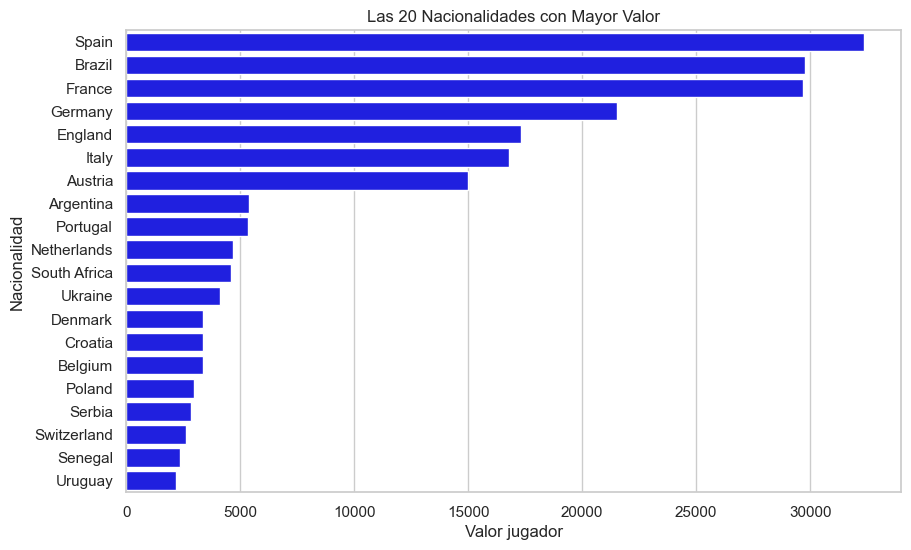

In [399]:
# visualizacion de las 20 nacionalidades con mayor valor total_jugador
df_nacionalidades = df_predicciones.groupby('jugador_nacionalidad')['total_jugador'].sum().reset_index()
df_nacionalidades = df_nacionalidades.sort_values('total_jugador', ascending=False)
top_20_nacionalidades = df_nacionalidades.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='jugador_nacionalidad', data=top_20_nacionalidades, color='blue')
plt.xlabel('Valor jugador')
plt.ylabel('Nacionalidad')
plt.title('Las 20 Nacionalidades con Mayor Valor')
plt.savefig('resources/14.prediccion_top20_nacionalidades.png', bbox_inches='tight')
plt.show()

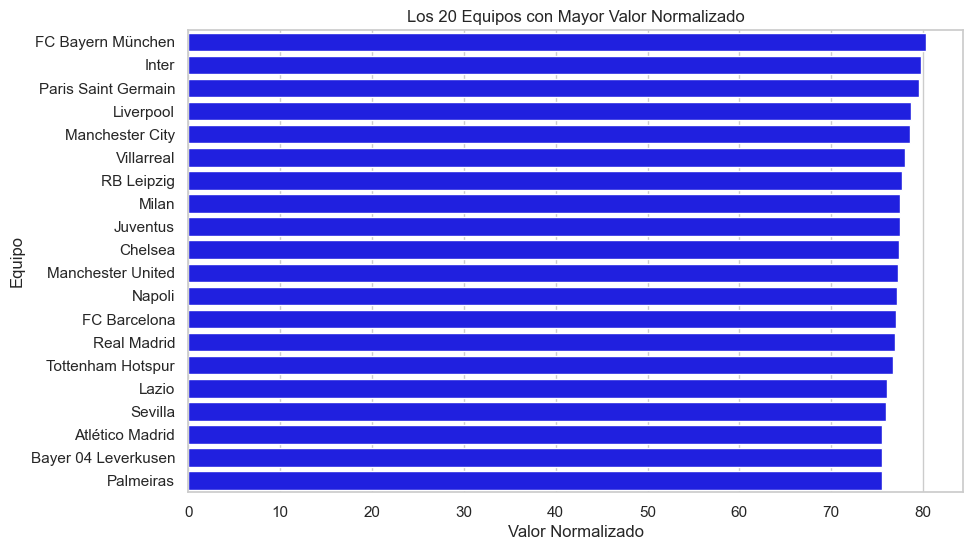

In [400]:
# Selecciona los 20 equipos con mayor valor normalizado
df_equipos = df_predicciones.groupby('equipo_nombre').agg({'total_jugador': 'sum', 'jugador_nombre': 'count'}).reset_index()
df_equipos['valor_normalizado'] = df_equipos['total_jugador'] / df_equipos['jugador_nombre']
df_equipos = df_equipos.sort_values('valor_normalizado', ascending=False)
top_20_equipos = df_equipos.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='valor_normalizado', y='equipo_nombre', data=top_20_equipos, color='blue')
plt.xlabel('Valor Normalizado')
plt.ylabel('Equipo')
plt.title('Los 20 Equipos con Mayor Valor Normalizado')
plt.savefig('resources/15.prediccion_top20_equiposnorm.png', bbox_inches='tight')
plt.show()

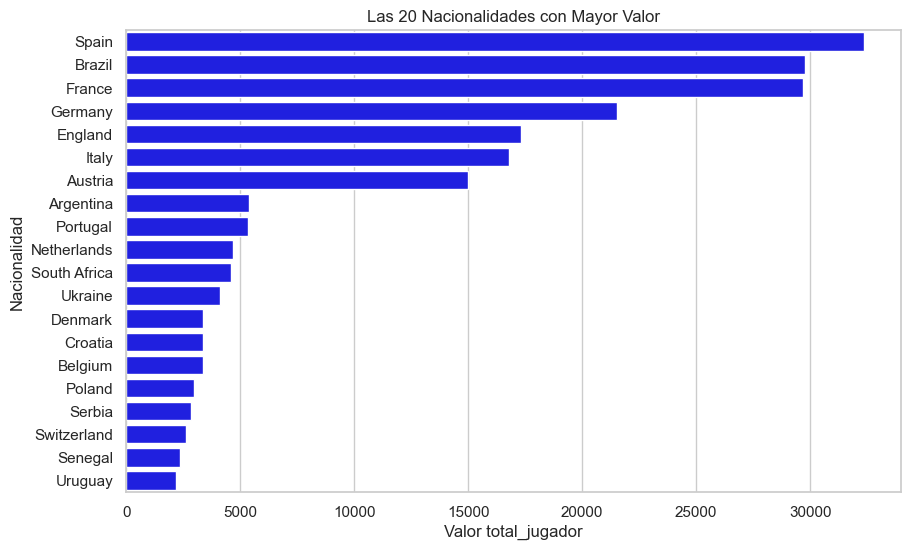

In [401]:
# visualizar 20 nacionalidades con mayor valor total_jugador
df_nacionalidades = df_predicciones.groupby('jugador_nacionalidad')['total_jugador'].sum().reset_index()
df_nacionalidades = df_nacionalidades.sort_values('total_jugador', ascending=False)
top_20_nacionalidades = df_nacionalidades.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='jugador_nacionalidad', data=top_20_nacionalidades, color='blue')
plt.xlabel('Valor total_jugador')
plt.ylabel('Nacionalidad')
plt.title('Las 20 Nacionalidades con Mayor Valor')
plt.savefig('resources/16.prediccion_top20_nacionalidades.png', bbox_inches='tight')
plt.show()